Index(['Date', 'Revenue'], dtype='object')


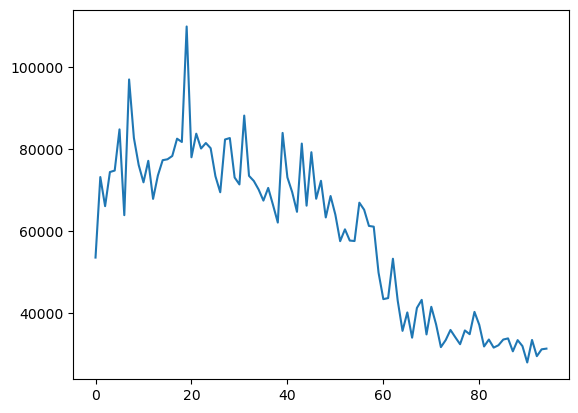

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
datos = pd.read_csv('burnett_sales_monthly.csv')

# Check the columns to ensure the correct column is selected
print(datos.columns)

# Select the second column
if datos.shape[1] > 1:
    y = datos.iloc[:, 1]
else:
    raise ValueError("The dataset does not have a second column.")

# Plot the data
plt.plot(y)
plt.show()


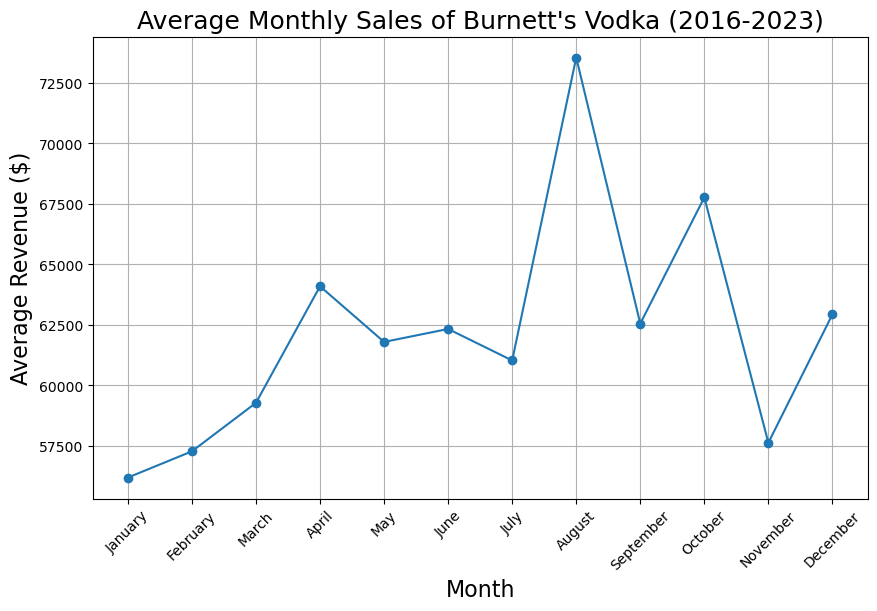

Maximum sales month: 8
Minimum sales month: 1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Filter data for Burnett's vodka
burnett_data = data[data['Brand'].str.contains("BURNETT", case=False, na=False)].copy()

# Ensure Date column is in datetime format
burnett_data['Date'] = pd.to_datetime(burnett_data['Date'])

# Extract month and year from the Date column
burnett_data['Month'] = burnett_data['Date'].dt.month
burnett_data['Year'] = burnett_data['Date'].dt.year

# Group by Month and Year to calculate the monthly revenue
monthly_revenue = burnett_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()


# Pivot the data to have months as columns and years as rows
monthly_revenue_pivot = monthly_revenue.pivot(index='Year', columns='Month', values='Revenue')

# Calculate the average revenue for each month across all years
average_monthly_revenue = monthly_revenue_pivot.mean()

# Plot the average monthly revenue
plt.figure(figsize=(10, 6))
average_monthly_revenue.plot(kind='line', marker='o')
plt.title("Average Monthly Sales of Burnett's Vodka (2016-2023)", fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel("Average Revenue ($)", fontsize=16)
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(True)
plt.show()

# Determine the months with maximum and minimum average sales
max_month = average_monthly_revenue.idxmax()
min_month = average_monthly_revenue.idxmin()

print(f"Maximum sales month: {max_month}")
print(f"Minimum sales month: {min_month}")


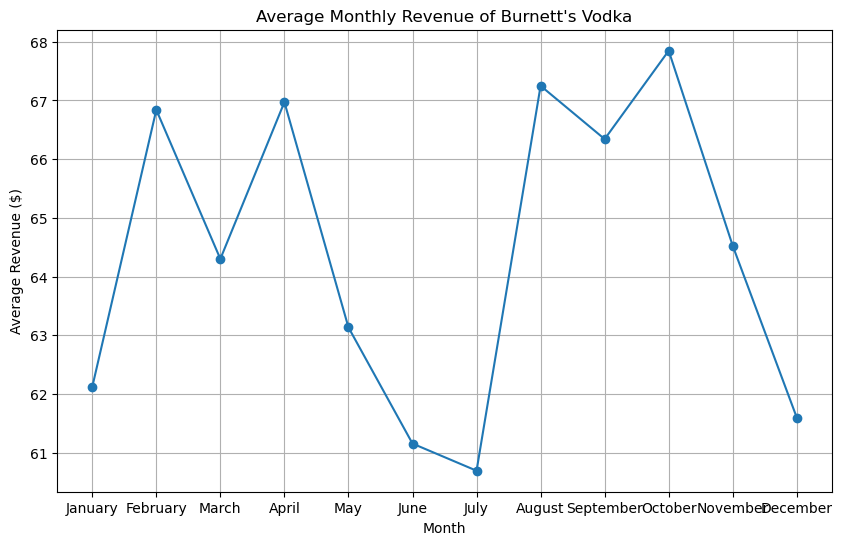

Month with highest average revenue: 10 ($67.85)
Month with lowest average revenue: 7 ($60.70)
Month with highest average revenue: October ($67.85)
Month with lowest average revenue: July ($60.70)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Filter data for Burnett's vodka
burnett_data = data[data['Brand'].str.contains("BURNETT", case=False, na=False)].copy()

# Ensure Date column is in datetime format
burnett_data['Date'] = pd.to_datetime(burnett_data['Date'])

# Extract month from the Date column
burnett_data['Month'] = burnett_data['Date'].dt.month

# Group by Month and calculate the average revenue
monthly_avg_revenue = burnett_data.groupby('Month')['Revenue'].mean()

# Plot the average monthly revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_revenue.index, monthly_avg_revenue, marker='o', linestyle='-')
plt.title("Average Monthly Revenue of Burnett's Vodka")
plt.xlabel('Month')
plt.ylabel("Average Revenue ($)")
plt.grid(True)
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

# Identify the months with the highest and lowest average revenue
max_revenue_month = monthly_avg_revenue.idxmax()
min_revenue_month = monthly_avg_revenue.idxmin()

max_revenue_value = monthly_avg_revenue.max()
min_revenue_value = monthly_avg_revenue.min()

print(f"Month with highest average revenue: {max_revenue_month} (${max_revenue_value:.2f})")
print(f"Month with lowest average revenue: {min_revenue_month} (${min_revenue_value:.2f})")

# Map month numbers to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

print(f"Month with highest average revenue: {month_map[max_revenue_month]} (${max_revenue_value:.2f})")
print(f"Month with lowest average revenue: {month_map[min_revenue_month]} (${min_revenue_value:.2f})")


Index(['Date', 'Revenue'], dtype='object')


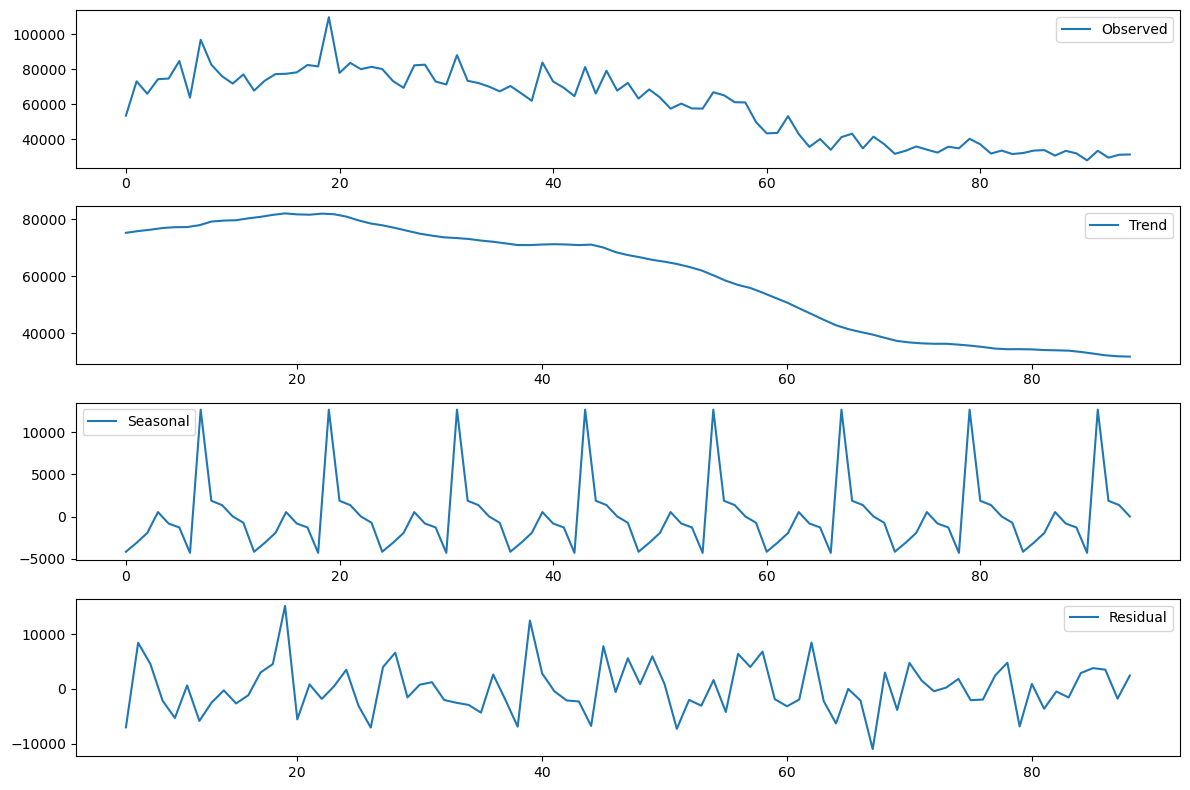

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
datos = pd.read_csv('burnett_sales_monthly.csv')

# Ensure the correct column is selected
print(datos.columns)

# Select the second column
if datos.shape[1] > 1:
    y = datos.iloc[:, 1]
else:
    raise ValueError("The dataset does not have a second column.")

# Decompose the time series
decomposition = seasonal_decompose(y, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ADF Statistic: -0.03595404479328606
p-value: 0.9554557731409128
The time series is non-stationary.


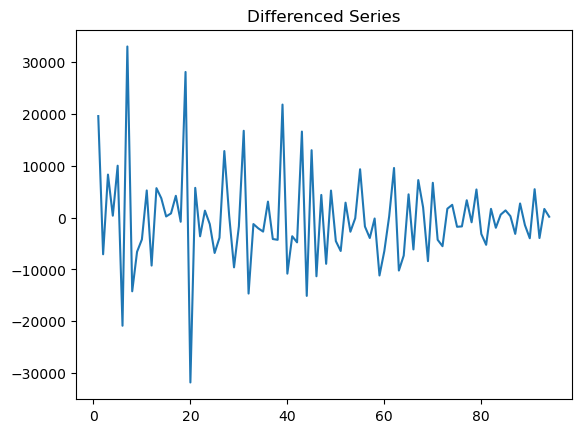

In [29]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(y.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] > 0.05:
    print("The time series is non-stationary.")
    # Apply first-order differencing
    y_diff = y.diff().dropna()
else:
    print("The time series is stationary.")
    y_diff = y

# Plot the differenced series
plt.plot(y_diff)
plt.title("Differenced Series")
plt.show()

ADF Statistic after second differencing: -6.8701180230968335
p-value after second differencing: 1.5232401133516118e-09
The time series is stationary after second differencing.


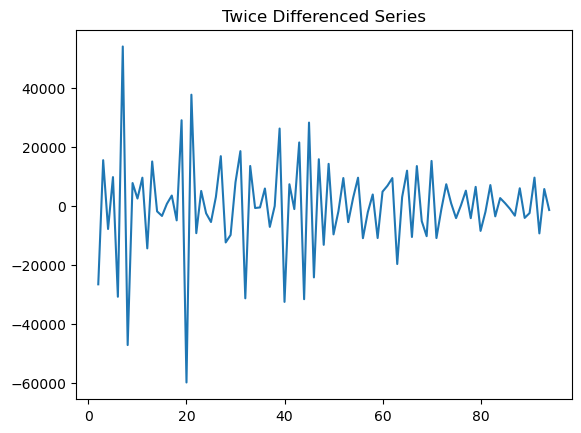

In [32]:
# Perform the second-order differencing
y_diff2 = y.diff().diff().dropna()

# Perform the ADF test on the twice-differenced series
result_diff2 = adfuller(y_diff2.dropna())
print('ADF Statistic after second differencing:', result_diff2[0])
print('p-value after second differencing:', result_diff2[1])

# Interpret the result
if result_diff2[1] > 0.05:
    print("The time series is still non-stationary after second differencing.")
else:
    print("The time series is stationary after second differencing.")

# Plot the twice-differenced series
plt.plot(y_diff2)
plt.title("Twice Differenced Series")
plt.show()

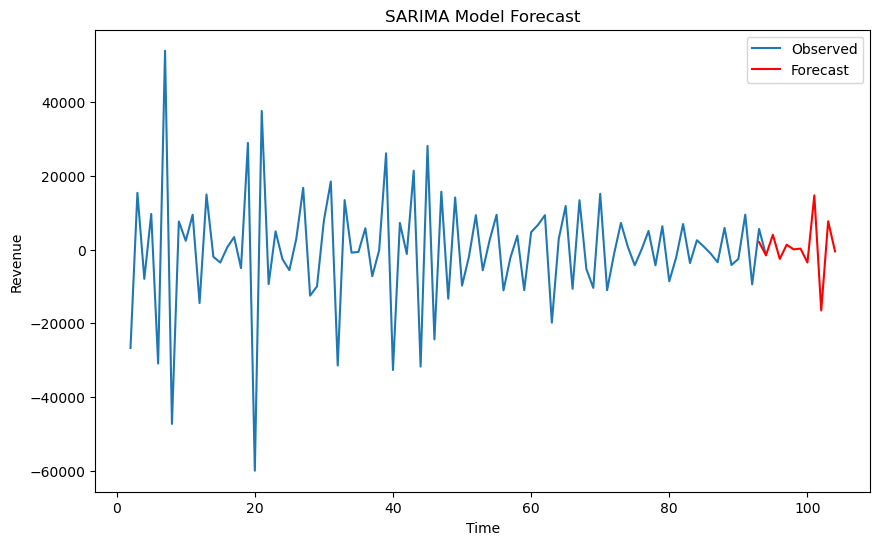

Forecasted Revenue for 2024:
93     33416.595501
94     31890.137881
95     35898.036791
96     33363.448706
97     34694.932302
98     34755.454840
99     35025.738293
100    31527.344901
101    46237.622394
102    29726.472659
103    37402.604157
104    36929.078667
Name: predicted_mean, dtype: float64


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model on the twice-differenced data
model = SARIMAX(y_diff2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future values (next 12 months for 2024)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_diff2.index, y_diff2, label='Observed')
plt.plot(range(len(y_diff2), len(y_diff2) + forecast_steps), forecast, label='Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Convert the differenced forecast back to the original scale
forecast_cumsum = forecast.cumsum()  # Cumulative sum to reverse differencing
forecast = y.iloc[-1] + forecast_cumsum  # Adding last known value to forecasted cumsum

# Print the forecasted values
print("Forecasted Revenue for 2024:")
print(forecast)

The SARIMA model has been used to forecast the revenue for Burnett's vodka for the year 2024.

Maximum Forecasted Value:
Month: September
Value: 46237.62
Interpretation: September is expected to have the highest revenue in 2024.

Minimum Forecasted Value:
Month: February
Value: 31890.14
Interpretation: February is expected to have the lowest revenue in 2024.


For July (around the 100th time point on the x-axis), the forecasted revenue values are:
July: 33416.595501, 31899.137881, 35898.036791
For August (around the 101st and 102nd time points on the x-axis), the forecasted revenue values are:
August: 33364.438706, 34694.932302

Trends in July and August:

The revenue values for July show a slight increase compared to the previous months.
The revenue values for August are higher than July, indicating a peak in revenue.

The observation that September has the highest forecasted revenue for 2024, despite not showing a similar peak in previous years, could be attributed to several factors:

Model Sensitivity to Recent Data:

The SARIMA model might give more weight to recent data trends. If there were significant changes or an unusual spike in the recent months before 2024, the model might project this forward, leading to higher forecasted values for September.

Data Variability and Noise:

Time series data can have random fluctuations that might not necessarily align with historical patterns. The model attempts to fit these fluctuations, and sometimes this can result in projections that deviate from past trends.
Structural Changes in Data:

There could have been structural changes in the market or external factors affecting sales that the model picks up on. For example, changes in marketing strategies, promotions, or even macroeconomic factors could impact the forecast differently than historical data.

Seasonal Adjustment:

The seasonal component in the SARIMA model is derived from the data. If there were recent changes in the seasonal patterns, these changes might be reflected in the forecast. It's possible the seasonal component might have been slightly adjusted by the model to better fit the data, leading to higher predictions in September.

Model Overfitting:

Overfitting can sometimes occur if the model is too complex or if there is too much noise in the data. This can result in the model capturing random fluctuations and projecting them as future trends.

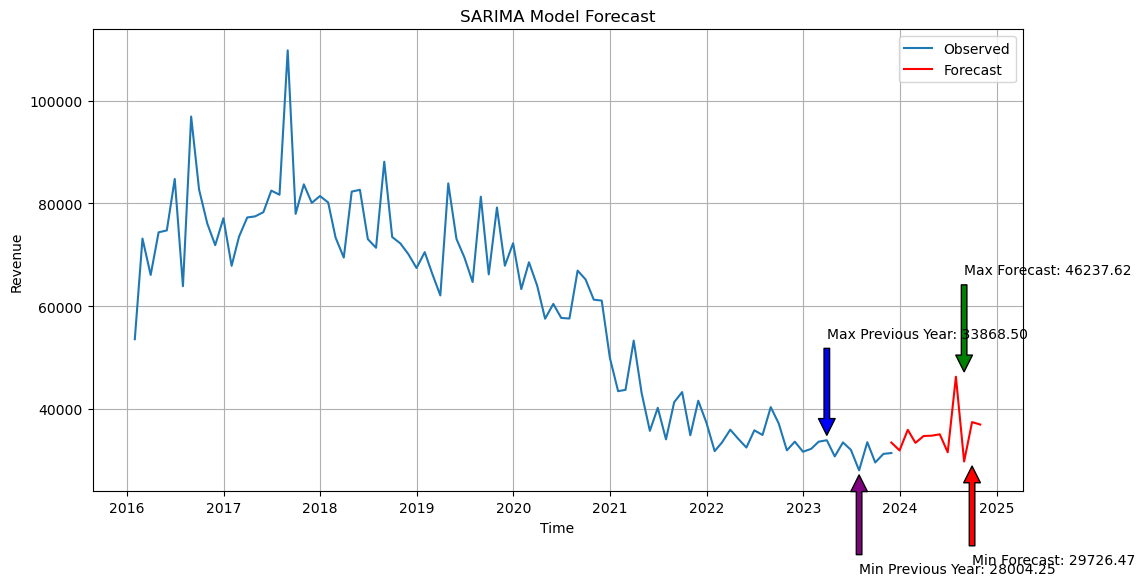

Forecasted Revenue for 2024:
2023-12-31    33416.595501
2024-01-31    31890.137881
2024-02-29    35898.036791
2024-03-31    33363.448706
2024-04-30    34694.932302
2024-05-31    34755.454840
2024-06-30    35025.738293
2024-07-31    31527.344901
2024-08-31    46237.622394
2024-09-30    29726.472659
2024-10-31    37402.604157
2024-11-30    36929.078667
Freq: ME, Name: predicted_mean, dtype: float64

Interpretation:
The SARIMA model has been used to forecast the revenue for Burnett's vodka for the year 2024. The forecasted values show the expected monthly revenue for the upcoming year. The annotations on the graph represent these forecasted values along with the maximum and minimum values of the previous year for comparison.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
datos = pd.read_csv('burnett_sales_monthly.csv')

# Ensure the 'Date' column is in datetime format and set it as the index
datos['Date'] = pd.to_datetime(datos['Date'])
datos.set_index('Date', inplace=True)

# Select the 'Revenue' column
y = datos['Revenue']

# Perform differencing to make the data stationary
y_diff = y.diff().dropna()
y_diff2 = y_diff.diff().dropna()

# Fit the SARIMA model on the twice-differenced data
model = SARIMAX(y_diff2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model
model_fit = model.fit(disp=False)

# Forecast future values (next 12 months for 2024)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Convert the differenced forecast back to the original scale if differencing was applied
if y_diff2.shape[0] > 0:
    forecast_cumsum = forecast.cumsum()  # Cumulative sum to reverse differencing
    forecast = y.iloc[-1] + forecast_cumsum  # Adding last known value to forecasted cumsum

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Observed')
plt.plot(pd.date_range(y.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', color='red')
plt.title("SARIMA Model Forecast")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)

# Annotate the maximum and minimum values of the forecast and the year before the forecast
max_forecast = forecast.max()
min_forecast = forecast.min()
max_forecast_date = forecast.idxmax()
min_forecast_date = forecast.idxmin()

previous_year_max = y[-12:].max()
previous_year_min = y[-12:].min()
previous_year_max_date = y[-12:].idxmax()
previous_year_min_date = y[-12:].idxmin()

plt.annotate(f'Max Forecast: {max_forecast:.2f}', xy=(max_forecast_date, max_forecast), xytext=(max_forecast_date, max_forecast + 20000),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Min Forecast: {min_forecast:.2f}', xy=(min_forecast_date, min_forecast), xytext=(min_forecast_date, min_forecast - 20000),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate(f'Max Previous Year: {previous_year_max:.2f}', xy=(previous_year_max_date, previous_year_max), xytext=(previous_year_max_date, previous_year_max + 20000),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'Min Previous Year: {previous_year_min:.2f}', xy=(previous_year_min_date, previous_year_min), xytext=(previous_year_min_date, previous_year_min - 20000),
             arrowprops=dict(facecolor='purple', shrink=0.05))

plt.show()

# Print the forecasted values
print("Forecasted Revenue for 2024:")
print(forecast)

# Interpretation of the results
print("\nInterpretation:")
print("The SARIMA model has been used to forecast the revenue for Burnett's vodka for the year 2024. The forecasted values show the expected monthly revenue for the upcoming year. The annotations on the graph represent these forecasted values along with the maximum and minimum values of the previous year for comparison.")


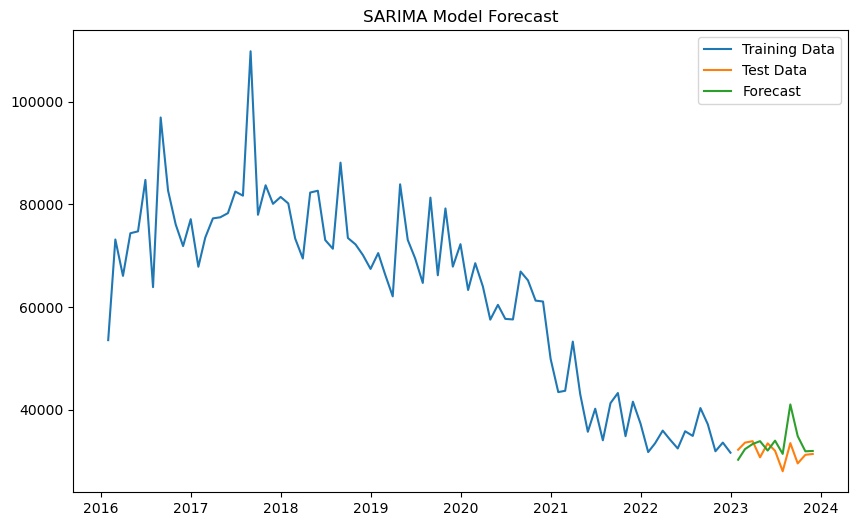

MAE: 2528.061510743704
MAPE: 8.067334975344114%
RMSE: 3286.7831038650143


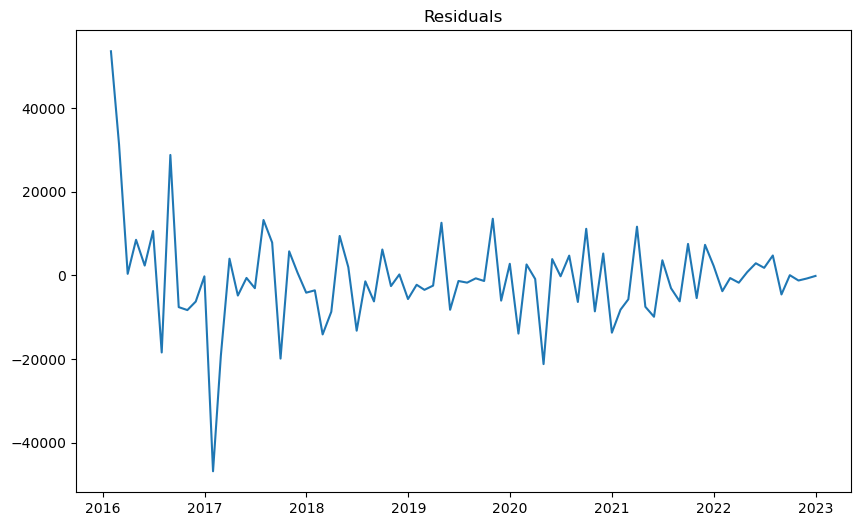

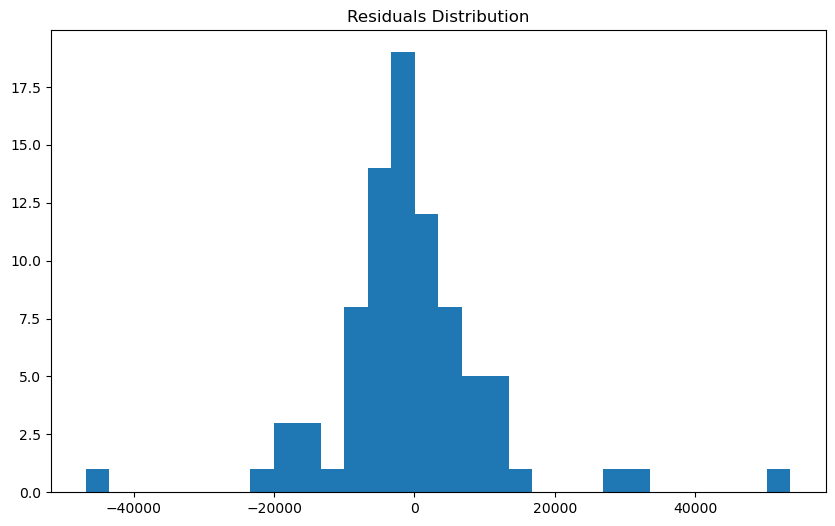

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
datos = pd.read_csv('burnett_sales_monthly.csv')
datos['Date'] = pd.to_datetime(datos['Date'])
datos.set_index('Date', inplace=True)
y = datos['Revenue']

# Split the data
train_data = y[:'2022']
test_data = y['2023':]

# Fit the SARIMA model on the training data
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast the test period
forecast = model_fit.forecast(steps=len(test_data))
forecast = pd.Series(forecast, index=test_data.index)

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'RMSE: {rmse}')

# Residual analysis
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Residuals Distribution')
plt.show()


Maximum sales month: August
Minimum sales month: July


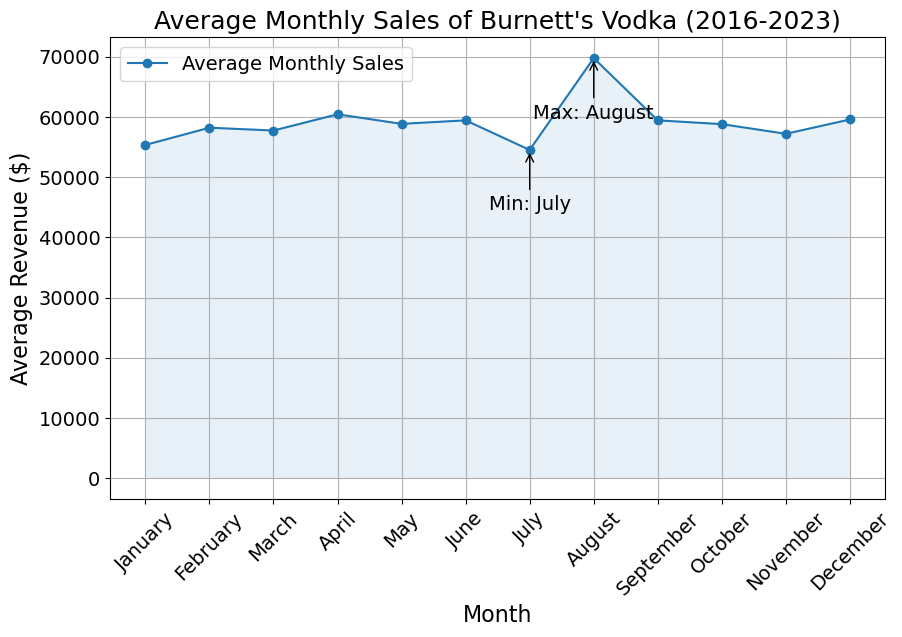

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for Burnett's vodka
burnett_data = data[data['Brand'].str.contains("BURNETT", case=False, na=False)].copy()

# Filter data for the years 2016 to 2023
burnett_data = burnett_data[(burnett_data['Date'] >= '2016-01-01') & (burnett_data['Date'] <= '2023-12-31')]

# Set Date as the index for resampling
burnett_data.set_index('Date', inplace=True)

# Aggregate sales data by month
burnett_sales_monthly = burnett_data.resample('M')['Revenue'].sum()

# Perform time series decomposition with a period of 12 (monthly seasonality)
decomposition = seasonal_decompose(burnett_sales_monthly, model='additive', period=12)

# Extract the seasonal component
seasonal = decomposition.seasonal

# Calculate average sales for each month across all years
average_monthly_sales = burnett_sales_monthly.groupby(burnett_sales_monthly.index.month).mean()

# Determine the peak and minimum sales months
peak_month = average_monthly_sales.idxmax()
min_month = average_monthly_sales.idxmin()

# Month names for better readability
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

print(f"Maximum sales month: {month_names[peak_month - 1]}")
print(f"Minimum sales month: {month_names[min_month - 1]}")

# Plot the average monthly sales to visualize seasonality
plt.figure(figsize=(10, 6))  # Adjusted the width to make the plots narrower
plt.plot(average_monthly_sales.index, average_monthly_sales, marker='o', linestyle='-', label="Average Monthly Sales")
plt.fill_between(average_monthly_sales.index, average_monthly_sales, alpha=0.1)

# Annotate peak and minimum months
plt.annotate(f'Max: {month_names[peak_month - 1]}', xy=(peak_month, average_monthly_sales[peak_month]),
             xytext=(peak_month, average_monthly_sales[peak_month] - 10000),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=14, ha='center')

plt.annotate(f'Min: {month_names[min_month - 1]}', xy=(min_month, average_monthly_sales[min_month]),
             xytext=(min_month, average_monthly_sales[min_month] - 10000),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=14, ha='center')

plt.title("Average Monthly Sales of Burnett's Vodka (2016-2023)", fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Revenue ($)', fontsize=16)
plt.xticks(ticks=average_monthly_sales.index, labels=month_names, fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

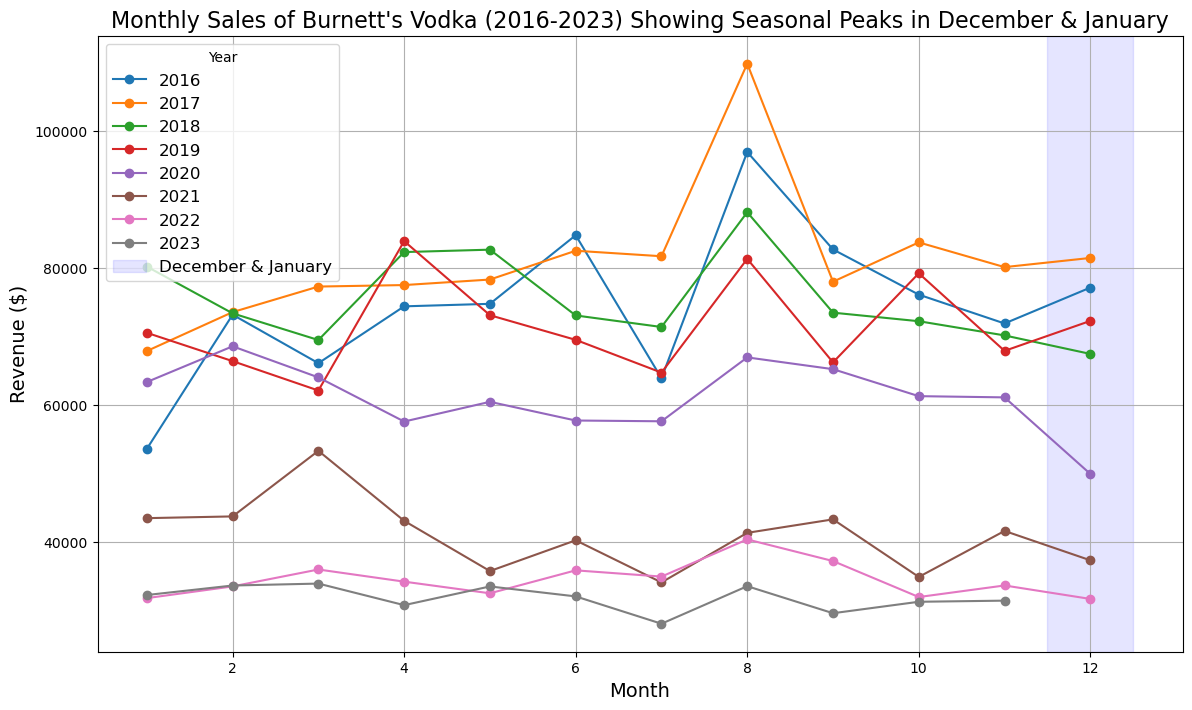

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for Burnett's vodka
burnett_data = data[data['Brand'].str.contains("BURNETT", case=False, na=False)].copy()

# Filter data for the years 2016 to 2023
burnett_data = burnett_data[(burnett_data['Date'] >= '2016-01-01') & (burnett_data['Date'] <= '2023-12-31')]

# Set Date as the index for resampling
burnett_data.set_index('Date', inplace=True)

# Aggregate sales data by month and year
monthly_sales = burnett_data['Revenue'].groupby([burnett_data.index.year, burnett_data.index.month]).sum()
monthly_sales.index.names = ['Year', 'Month']

# Unstack the multi-index series to create a DataFrame
monthly_sales_df = monthly_sales.unstack(level=0)

# Plot the monthly sales data to visualize the seasonal peaks in December and January
plt.figure(figsize=(14, 8))
for year in monthly_sales_df.columns:
    plt.plot(monthly_sales_df.index, monthly_sales_df[year], marker='o', label=str(year))

# Highlight December and January
plt.axvspan(11.5, 12.5, color='blue', alpha=0.1, label='December & January')

plt.title("Monthly Sales of Burnett's Vodka (2016-2023) Showing Seasonal Peaks in December & January", fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.legend(title='Year', fontsize=12)
plt.grid(True)
plt.show()

In [10]:
datos.head()

,Date,Revenue
0,2016-01-31,53552.32
1,2016-02-29,73160.22
2,2016-03-31,66072.12
3,2016-04-30,74379.48
4,2016-05-31,74746.68


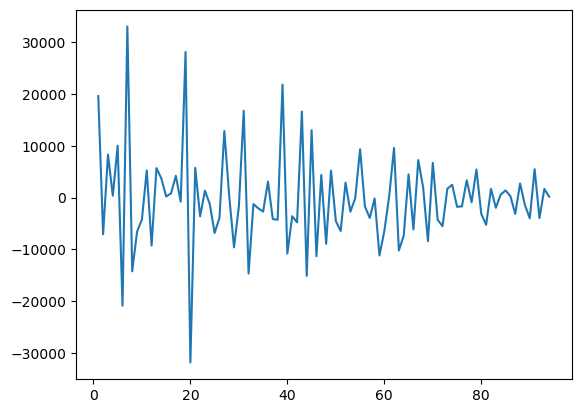

In [17]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
y = y.diff().dropna()

plt.plot(z)

In [19]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 12
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: -8.726004926656026
p-value: 3.2873414664327297e-14
Regular differences:  0
Seasonal differences: 0


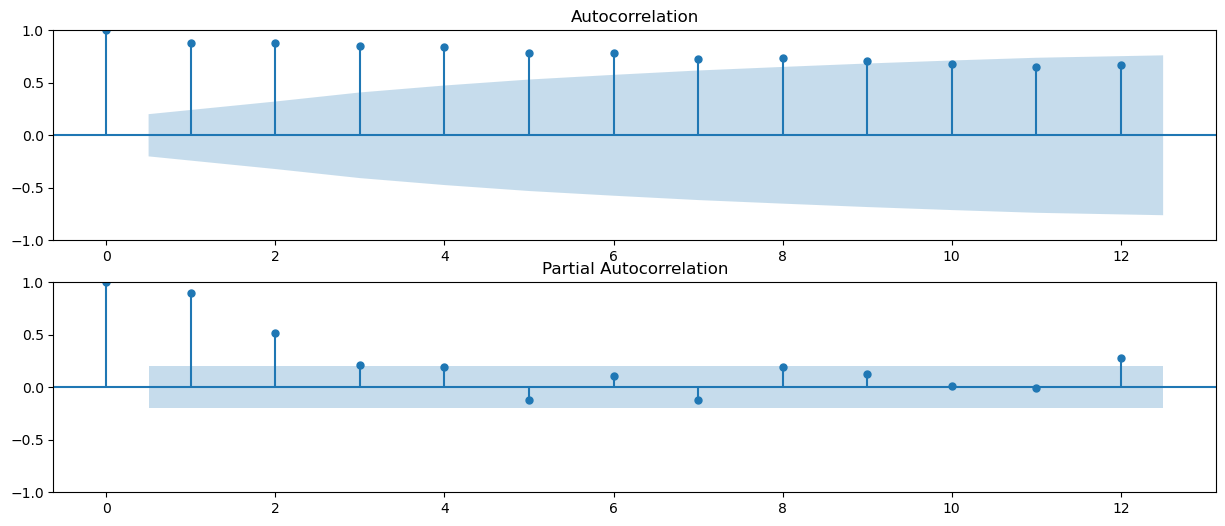

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 12 # play with this parameter

# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.

fig, ax = plt.subplots(2,1, figsize = (15,6))

plot_acf(y, lags = nlags, ax=ax[0])
plot_pacf(y, lags = nlags, method="ols", ax=ax[1])
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04317D+01    |proj g|=  4.57100D-01

At iterate    5    f=  1.03010D+01    |proj g|=  5.37542D-02

At iterate   10    f=  1.02907D+01    |proj g|=  2.92193D-02

At iterate   15    f=  1.02883D+01    |proj g|=  3.67837D-02

At iterate   20    f=  1.02874D+01    |proj g|=  2.31551D-02

At iterate   25    f=  1.02864D+01    |proj g|=  2.10820D-02


 This problem is unconstrained.



At iterate   30    f=  1.02839D+01    |proj g|=  6.07069D-02

At iterate   35    f=  1.02826D+01    |proj g|=  1.30347D-02

At iterate   40    f=  1.02824D+01    |proj g|=  1.85598D-02

At iterate   45    f=  1.02820D+01    |proj g|=  8.72944D-03

At iterate   50    f=  1.02818D+01    |proj g|=  7.32355D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   7.324D-03   1.028D+01
  F =   10.281801222894071     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:                Reve

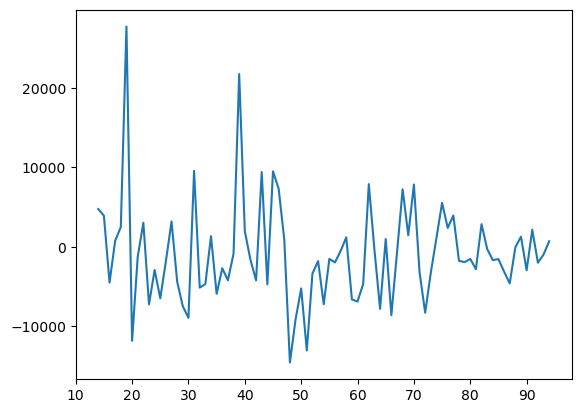

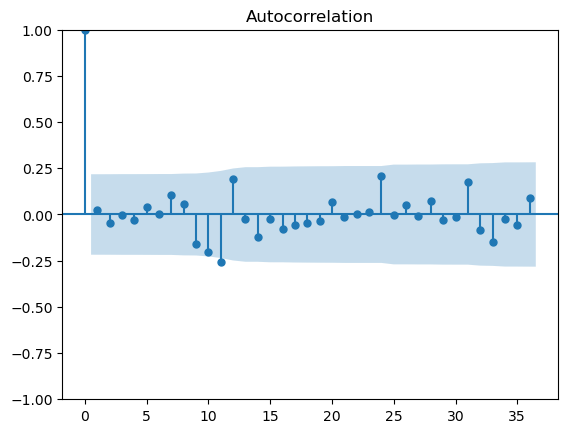

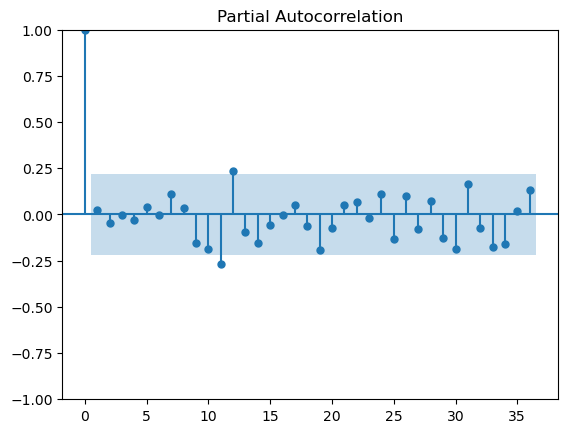

In [22]:
s = 12

fit = SARIMAX(endog = y, order = (0,0,9), seasonal_order = (0,0,0,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=36

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
#plot_pacf(residuos,lags = nlags)
plt.show()

In [23]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


Ljung-Box for the residuals
      lb_stat  lb_pvalue
25  26.760322   0.367964
Shapiro test for residuals: Statistic value 0.900962233543396 p-value 1.1958204595430288e-05


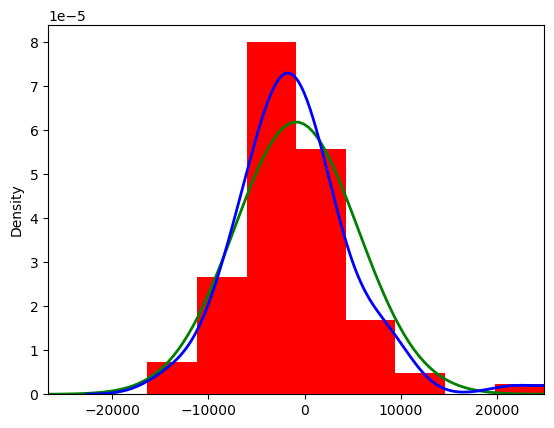

In [24]:
# Box test for autocorrelations

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[25])

print("Ljung-Box for the residuals")
print(box_test)

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapiro test for residuals: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -4*sigma, mu +4*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 4*std, mean + 4*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 4*std, mean + 4*std)

plt.show()

Ljung-Box for squared residuals
      lb_stat  lb_pvalue
20  20.682037   0.416055


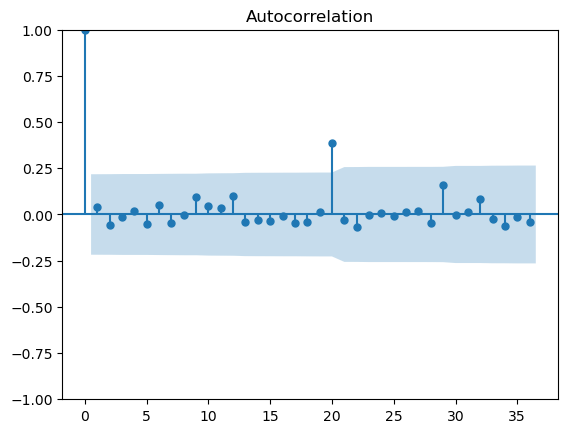

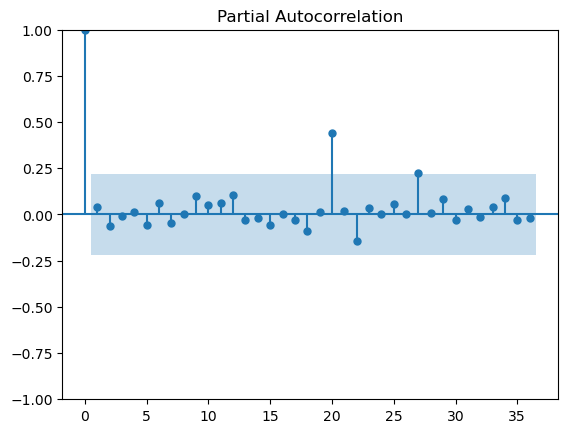

In [25]:
# Study the squared residuals for SWN

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[20])
print("Ljung-Box for squared residuals")
print(box_test2)

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags,method="ols")
plt.show()

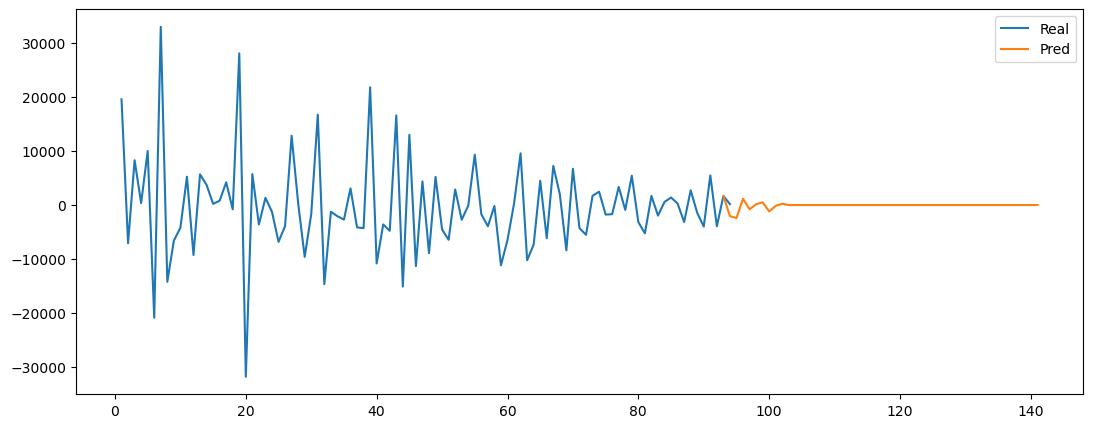

In [26]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 48)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)
plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()

In [27]:
# MORE FORECAST INFORMATION

forecast_result = fit.get_forecast(steps=12)
y_pred = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  
stderr = forecast_result.se_mean 

print("point predictions")
print(y_pred)
print("confidence intervals around point predictions")
print(conf_int)
print("standard error of point predictions")
print(stderr)

point predictions
94    -2060.936368
95    -2410.895738
96     1160.146202
97     -789.497193
98      144.701326
99      499.506444
100   -1192.422422
101    -147.568534
102     243.080425
103       0.000000
104       0.000000
105       0.000000
Name: predicted_mean, dtype: float64
confidence intervals around point predictions
     lower Revenue  upper Revenue
94   -14012.818865    9890.946128
95   -17690.168253   12868.376777
96   -14252.804954   16573.097359
97   -16276.414287   14697.419901
98   -15557.695091   15847.097743
99   -15248.095276   16247.108165
100  -16939.947173   14555.102329
101  -16355.158528   16060.021460
102  -16301.749777   16787.910628
103  -17066.863589   17066.863589
104  -17066.863589   17066.863589
105  -17066.863589   17066.863589
standard error of point predictions
94     6098.011285
95     7795.690449
96     7863.895091
97     7901.633508
98     8011.573958
99     8034.638312
100    8034.599041
101    8269.330519
102    8441.395012
103    8707.743471
104

In [11]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Asumiendo que 'pred_means' contiene tus predicciones como una serie de pandas
# # y que 'y' es tu serie temporal original

# # Crear un nuevo índice para las predicciones que continúe desde el último índice de 'y'
# nuevos_indices = range(y.index[-1] + 1, y.index[-1] + 1 + len(y_pred))

# # Crear una nueva serie de pandas para las predicciones, usando los nuevos índices
# y_predicciones = pd.Series(y_pred, index=nuevos_indices)

# # Trazar
# plt.figure(figsize=(13, 5))
# plt.plot(y, label='Real')
# plt.plot(y_predicciones, 'r', label='Point predictions')
# plt.legend()
# plt.title('Real values with point predictions')
# plt.show()

In [12]:
# MORE FORECAST INFORMATION

media = np.mean(residuos)
desviacion_std = np.std(residuos)

# Standardized residuals
residuos_estand = (residuos - media) / desviacion_std

# Verification
#print("Standardized residuals:", residuos_estand)
print("Mean:", np.mean(residuos_estand))
print("Standard deviation:", np.std(residuos_estand))


quantile_2_5=np.quantile(residuos_estand, 0.025)
quantile_97_5=np.quantile(residuos_estand, 0.975)

print("We must compare the following numbers with +/- 1.96 from the standard normal")
print(quantile_2_5,quantile_97_5)

Mean: 2.868076146948321e-16
Standard deviation: 1.0
We must compare the following numbers with +/- 1.96 from the standard normal
-1.2768411386317076 3.0061828337643326


In [1]:
pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
datos = pd.read_csv('burnett_sales_monthly.csv')

# Ensure the 'Date' column is in datetime format
datos['Date'] = pd.to_datetime(datos['Date'])

# Rename columns to fit Prophet's expected input format
datos.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Check the first few rows of the dataframe to ensure it's correctly formatted
print(datos.head())


          ds         y
0 2016-01-31  53552.32
1 2016-02-29  73160.22
2 2016-03-31  66072.12
3 2016-04-30  74379.48
4 2016-05-31  74746.68


In [3]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(datos)

15:42:50 - cmdstanpy - INFO - Chain [1] start processing
15:42:51 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# Create a dataframe with future dates for predictions (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future values
forecast = model.predict(future)

# Show the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds          yhat    yhat_lower    yhat_upper
102 2024-07-31  10655.733404   3209.647441  18150.141949
103 2024-08-31  30860.179448  23155.426528  38324.849812
104 2024-09-30  19754.475198  12233.287059  27408.359839
105 2024-10-31  13115.776258   6095.858020  21105.169052
106 2024-11-30  12773.028192   5373.579652  20251.484737


/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


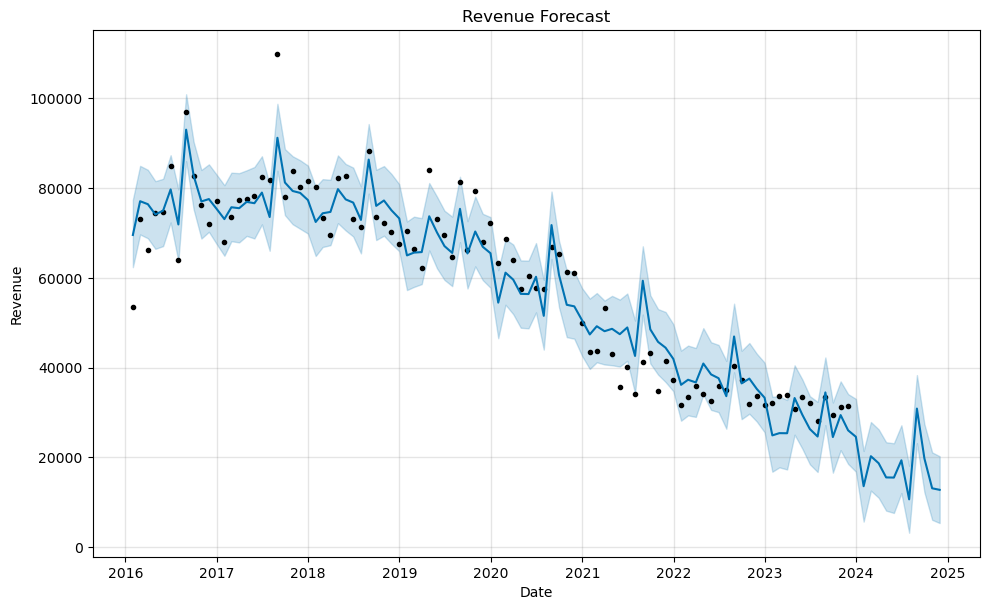

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

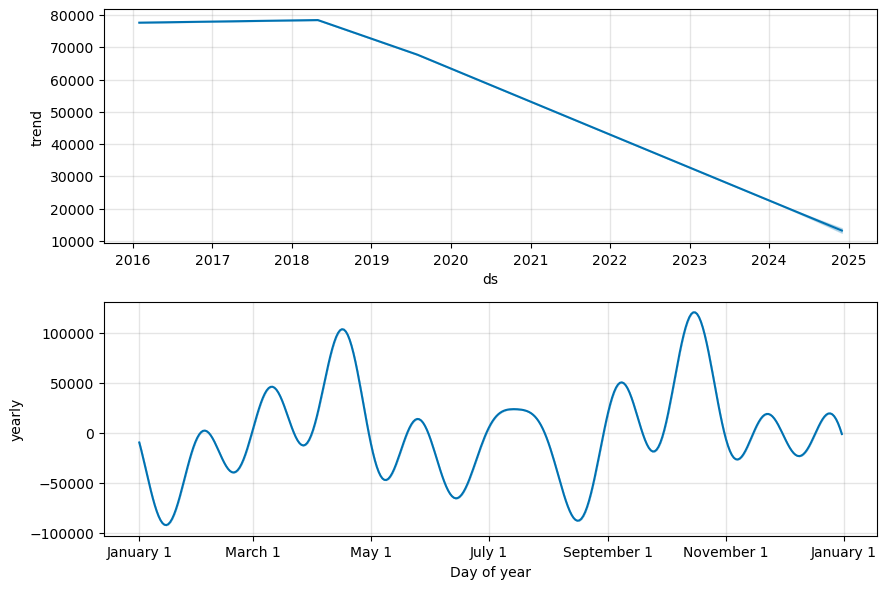

In [5]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

In [6]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_performance = performance_metrics(df_cv)
print(df_performance)

  0%|          | 0/10 [00:00<?, ?it/s]

15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] done processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] done processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1]

     horizon           mse          rmse           mae      mape     mdape  \
0    41 days  1.205119e+08  10977.791516   9589.753926  0.167794  0.146407   
1    42 days  1.217372e+08  11033.459099   9668.485493  0.170088  0.146407   
2    46 days  1.191246e+08  10914.423487   9520.659809  0.168532  0.139682   
3    48 days  1.123694e+08  10600.441476   8864.970256  0.159397  0.138091   
4    52 days  1.165640e+08  10796.480000   9090.014006  0.170679  0.162142   
..       ...           ...           ...           ...       ...       ...   
104 355 days  1.598483e+08  12643.111271  10556.025600  0.264771  0.225193   
105 357 days  1.380851e+08  11750.960240   9654.793851  0.248042  0.204837   
106 360 days  1.135317e+08  10655.126470   8918.807725  0.228006  0.204837   
107 362 days  1.219306e+08  11042.220023   9259.891487  0.238728  0.204837   
108 365 days  1.363778e+08  11678.092159  10003.761907  0.262667  0.225806   

        smape  coverage  
0    0.162073  0.166667  
1    0.1641

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


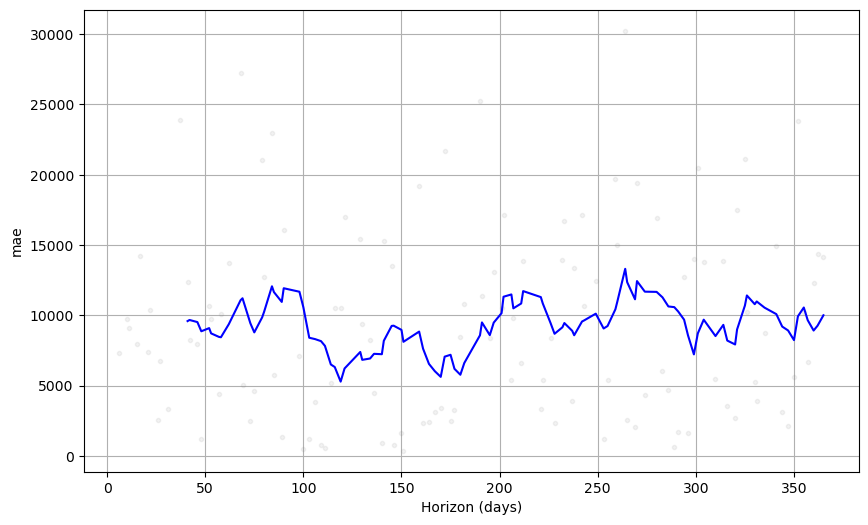

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


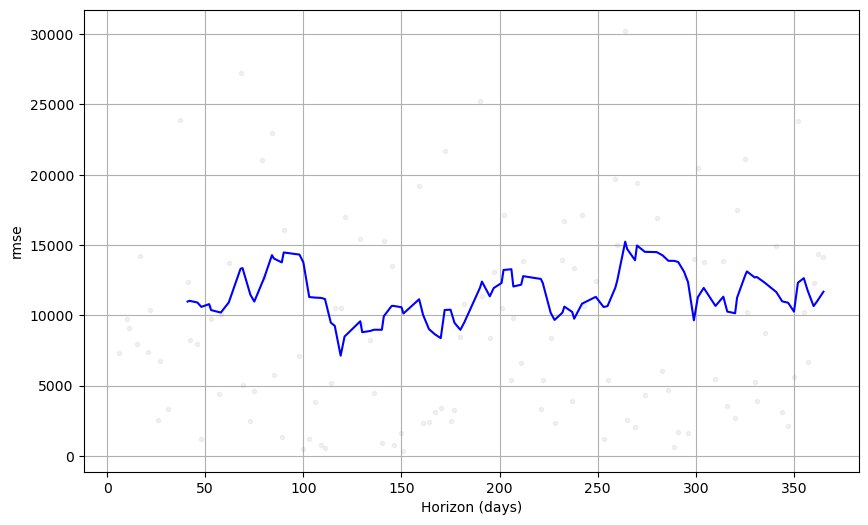

In [7]:
from prophet.plot import plot_cross_validation_metric

# Plot the Mean Absolute Error
fig_mae = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

# Plot the Root Mean Squared Error
fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [11]:
import pandas as pd

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Display the columns of the dataset
print(vodka_data.columns)


Index(['Date', 'Store Number', 'County', 'Lat', 'Lon', 'Main Category',
       'Category Name', 'Item Description', 'Vendor Name',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Revenue', 'Volume Sold (Liters)', 'Brand'],
      dtype='object')


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit Prophet's expected input format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Create time-based features
burnetts_data['month'] = burnetts_data['ds'].dt.month
burnetts_data['quarter'] = burnetts_data['ds'].dt.quarter
burnetts_data['day_of_week'] = burnetts_data['ds'].dt.dayofweek

# Create lag features
burnetts_data['lag_1'] = burnetts_data['y'].shift(1)
burnetts_data['lag_2'] = burnetts_data['y'].shift(2)

# Create rolling window statistics
burnetts_data['rolling_mean_3'] = burnetts_data['y'].rolling(window=3).mean()
burnetts_data['rolling_std_3'] = burnetts_data['y'].rolling(window=3).std()

# Drop rows with NaN values created by lag and rolling operations
burnetts_data = burnetts_data.dropna()

# Check the new dataset with additional features
print(burnetts_data.head())


            ds  Store Number       County        Lat        Lon Main Category  \
405 2012-01-03          2573    MUSCATINE  41.451349 -91.035138         VODKA   
487 2012-01-03          2603        SCOTT  41.552338 -90.483701         VODKA   
545 2012-01-03          3456  CERRO GORDO  43.142868 -93.378772         VODKA   
614 2012-01-03          2959         POLK  41.637408 -93.697647         VODKA   
658 2012-01-03          2591         CASS  41.403856 -94.990031         VODKA   

               Category Name      Item Description         Vendor Name  \
405           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
487  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
545           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
614           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
658           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   

     Bottle Volume (ml)  ...      y  Volume Sold (Liters)     Brand 

15:57:51 - cmdstanpy - INFO - Chain [1] start processing
16:00:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/19 [00:00<?, ?it/s]

16:00:03 - cmdstanpy - INFO - Chain [1] start processing
16:00:23 - cmdstanpy - INFO - Chain [1] done processing
16:00:25 - cmdstanpy - INFO - Chain [1] start processing
16:00:27 - cmdstanpy - INFO - Chain [1] done processing
16:00:29 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:33 - cmdstanpy - INFO - Chain [1] start processing
16:01:08 - cmdstanpy - INFO - Chain [1] done processing
16:01:11 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:19 - cmdstanpy - INFO - Chain [1] start processing
16:01:22 - cmdstanpy - INFO - Chain [1] done processing
16:01:25 - cmdstanpy - INFO - Chain [1] start processing
16:01:30 - cmdstanpy - INFO - Chain [1] done processing
16:01:33 - cmdstanpy - INFO - Chain [1] start processing
16:01:40 - cmdstanpy - INFO - Chain [1] done processing
16:01:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:57 - cmdstanpy - INFO - Chain [1]

     horizon          mse       rmse        mae     mdape     smape  coverage
0    36 days  6946.519190  83.345781  44.410937  0.667509  0.746972  0.197157
1    37 days  7322.797812  85.573348  44.904060  0.670306  0.747957  0.196376
2    38 days  7308.275477  85.488452  44.757393  0.667469  0.747472  0.196408
3    39 days  7478.807025  86.480096  44.908837  0.667560  0.747341  0.196358
4    40 days  7638.733338  87.399847  45.182263  0.667469  0.747689  0.196419
..       ...          ...        ...        ...       ...       ...       ...
325 361 days  8826.188875  93.947799  44.800418  0.671529  0.748176  0.195106
326 362 days  8761.065607  93.600564  44.814957  0.671592  0.748754  0.195192
327 363 days  8743.753246  93.508038  44.753018  0.673093  0.748428  0.195429
328 364 days  8719.674473  93.379197  44.666056  0.671553  0.748477  0.195412
329 365 days  8837.237420  94.006582  44.786100  0.676566  0.749388  0.195330

[330 rows x 7 columns]


/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


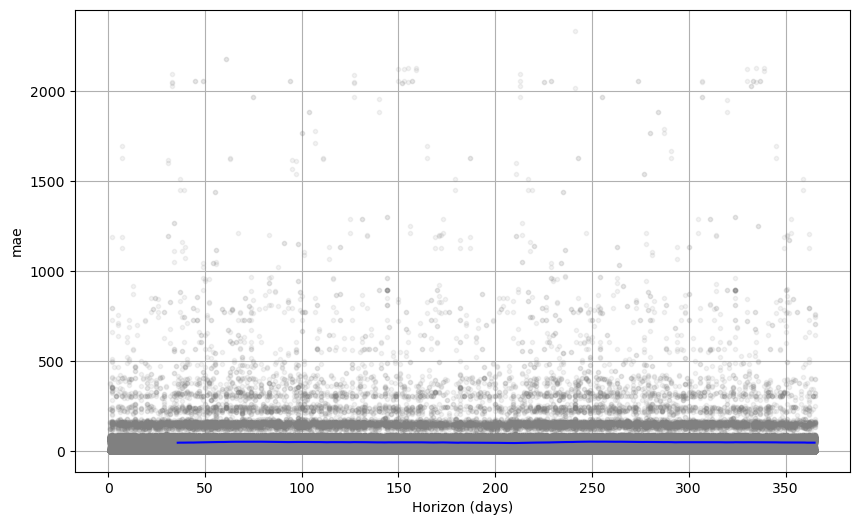

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


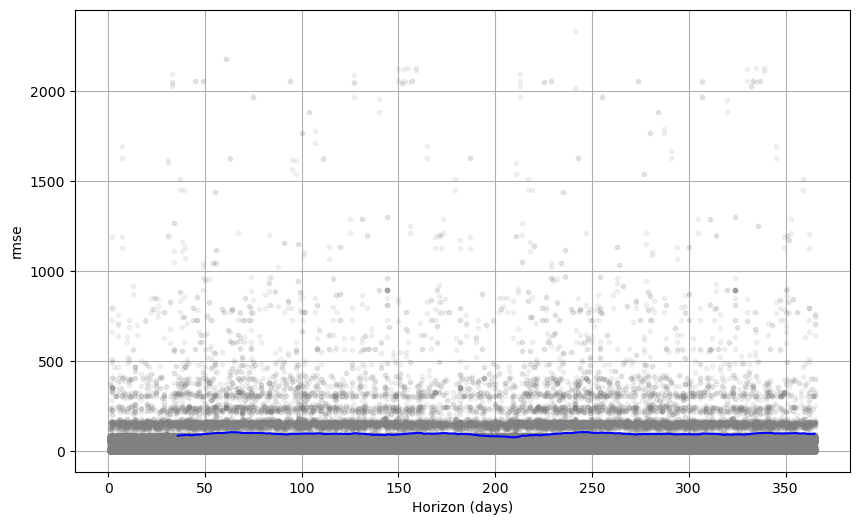

In [13]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Initialize the Prophet model
model = Prophet()

# Add regressors
model.add_regressor('month')
model.add_regressor('quarter')
model.add_regressor('day_of_week')
model.add_regressor('lag_1')
model.add_regressor('lag_2')
model.add_regressor('rolling_mean_3')
model.add_regressor('rolling_std_3')

# Fit the model to the data
model.fit(burnetts_data)

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_performance = performance_metrics(df_cv)
print(df_performance)

# Plot the cross-validation metrics
fig_mae = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


             ds       yhat  yhat_lower  yhat_upper
2918 2024-07-31  46.673592   46.351134   47.022927
2919 2024-08-31  46.650592   46.312460   46.993344
2920 2024-09-30  46.670096   46.312372   47.018023
2921 2024-10-31  46.673642   46.323479   46.985494
2922 2024-11-30  46.648596   46.323440   46.993610


/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


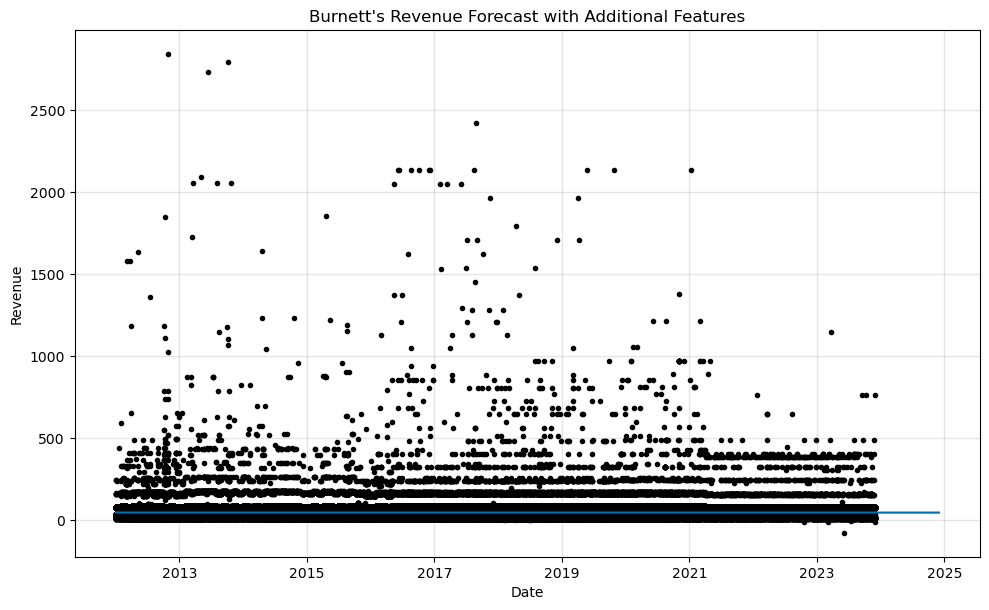

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

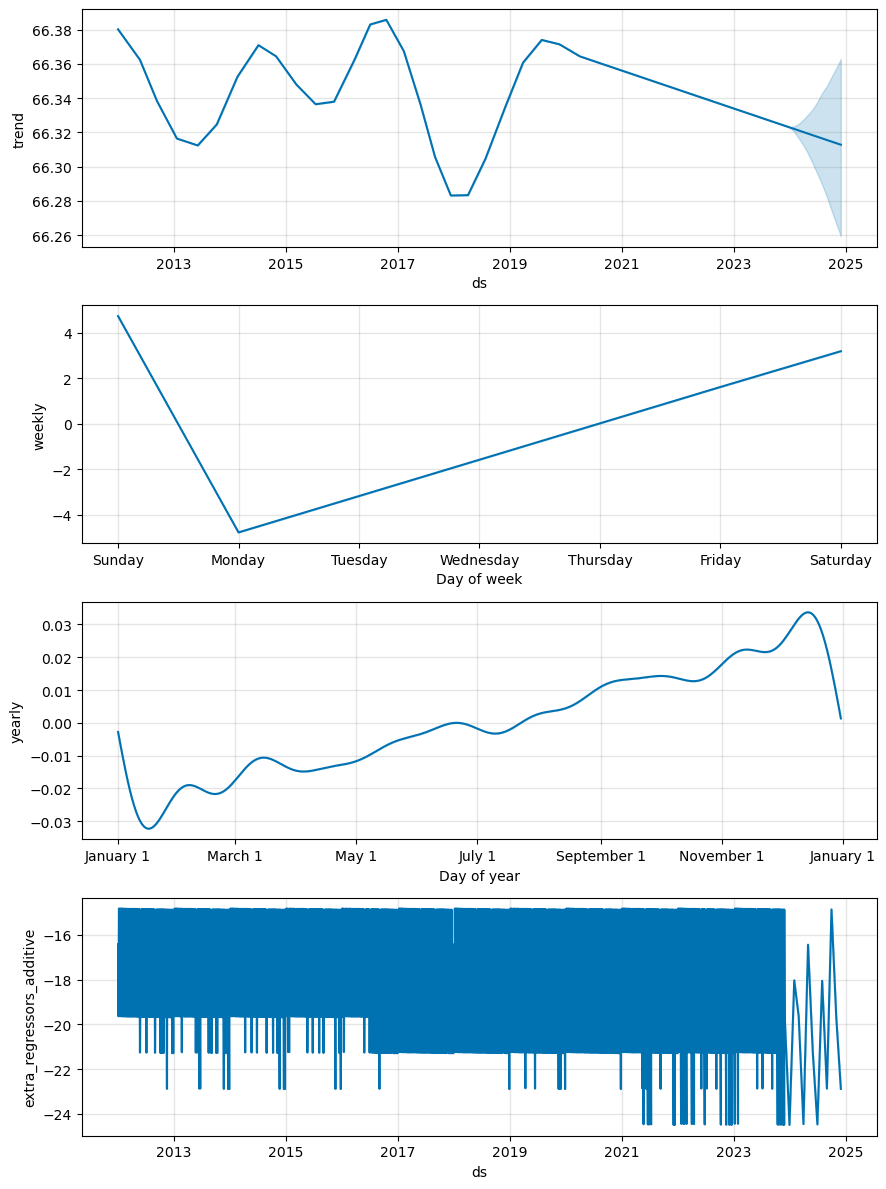

In [14]:
# Create a dataframe with future dates for predictions (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Add future values of additional features (using mean values for simplicity)
future['month'] = future['ds'].dt.month
future['quarter'] = future['ds'].dt.quarter
future['day_of_week'] = future['ds'].dt.dayofweek
future['lag_1'] = burnetts_data['y'].mean()  # Simplified approach
future['lag_2'] = burnetts_data['y'].mean()  # Simplified approach
future['rolling_mean_3'] = burnetts_data['rolling_mean_3'].iloc[-1]  # Simplified approach
future['rolling_std_3'] = burnetts_data['rolling_std_3'].iloc[-1]  # Simplified approach

# Predict future values
forecast = model.predict(future)

# Show the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Burnett's Revenue Forecast with Additional Features")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

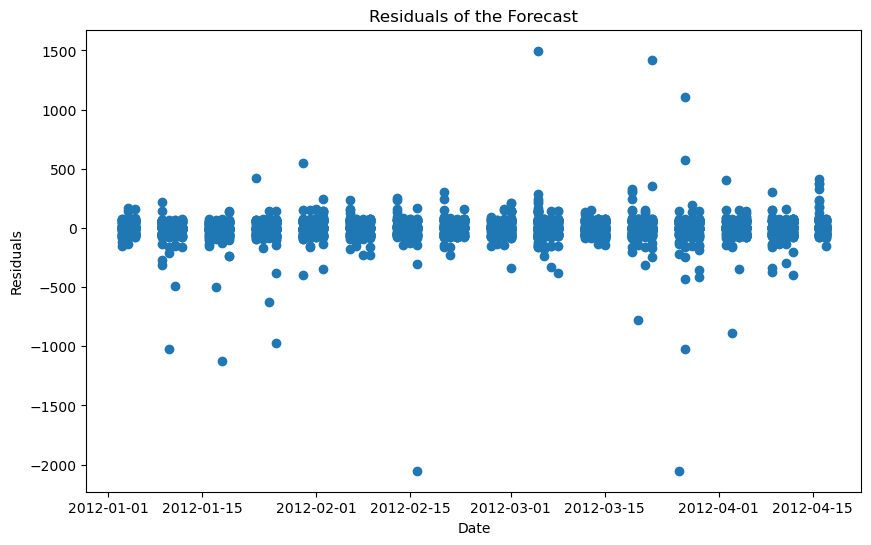

In [15]:
import matplotlib.pyplot as plt

# Calculate residuals
burnetts_data['yhat'] = model.predict(burnetts_data)['yhat']
burnetts_data['residuals'] = burnetts_data['y'] - burnetts_data['yhat']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(burnetts_data['ds'], burnetts_data['residuals'], marker='o', linestyle='none')
plt.title("Residuals of the Forecast")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

In [19]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit the time series format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)
burnetts_data.set_index('ds', inplace=True)

# Drop columns that are not useful or problematic for XGBoost
burnetts_data.drop(columns=['Store Number', 'County', 'Lat', 'Lon', 'Main Category', 'Category Name', 'Item Description', 'Vendor Name', 'Brand'], inplace=True)

# Create lag features
burnetts_data['lag_1'] = burnetts_data['y'].shift(1)
burnetts_data['lag_2'] = burnetts_data['y'].shift(2)
burnetts_data['lag_3'] = burnetts_data['y'].shift(3)

# Create rolling window statistics
burnetts_data['rolling_mean_3'] = burnetts_data['y'].rolling(window=3).mean()
burnetts_data['rolling_std_3'] = burnetts_data['y'].rolling(window=3).std()

# Drop rows with NaN values created by lag and rolling operations
burnetts_data = burnetts_data.dropna()

# Create time-based features
burnetts_data['month'] = burnetts_data.index.month
burnetts_data['quarter'] = burnetts_data.index.quarter
burnetts_data['day_of_week'] = burnetts_data.index.dayofweek

# One-hot encode categorical features (if any)
# burnetts_data = pd.get_dummies(burnetts_data, columns=['month', 'quarter', 'day_of_week'])

# Split the data into train and test sets
X = burnetts_data.drop(columns=['y'])
y = burnetts_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the first few rows of the preprocessed data
print(burnetts_data.head())

            Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
ds                                                                       
2012-01-03                 750               3.88                 6.15   
2012-01-03                1750               8.43                13.15   
2012-01-03                1750               8.43                13.15   
2012-01-03                 750               4.55                 6.82   
2012-01-03                 750               4.55                 6.82   

            Bottles Sold      y  Volume Sold (Liters)  lag_1  lag_2  lag_3  \
ds                                                                           
2012-01-03             2  12.30                   1.5  78.90  18.45  78.90   
2012-01-03             2  26.30                   3.5  12.30  78.90  18.45   
2012-01-03             6  78.90                  10.5  26.30  12.30  78.90   
2012-01-03             2  13.64                   1.5  78.90  26.30  12.30   
2012-01-03   

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit Prophet's expected input format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Create time-based features
burnetts_data['month'] = burnetts_data['ds'].dt.month
burnetts_data['quarter'] = burnetts_data['ds'].dt.quarter
burnetts_data['day_of_week'] = burnetts_data['ds'].dt.dayofweek

# Add price feature
burnetts_data['price'] = burnetts_data['State Bottle Retail']

# Create hypothetical discount feature
burnetts_data['discount'] = 0  # No discount in historical data

# Check the data structure
print(burnetts_data.head())


            ds  Store Number       County        Lat        Lon Main Category  \
66  2012-01-03          4073    WINNEBAGO  43.261538 -93.633306         VODKA   
209 2012-01-03          2614        SCOTT  41.556781 -90.548919         VODKA   
405 2012-01-03          2573    MUSCATINE  41.451349 -91.035138         VODKA   
487 2012-01-03          2603        SCOTT  41.552338 -90.483701         VODKA   
545 2012-01-03          3456  CERRO GORDO  43.142868 -93.378772         VODKA   

               Category Name      Item Description         Vendor Name  \
66            AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
209  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
405           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
487  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
545           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   

     Bottle Volume (ml)  ...  State Bottle Retail  Bottles Sold     

In [32]:
# Train the Prophet model with additional regressors
model = Prophet()
model.add_regressor('month')
model.add_regressor('quarter')
model.add_regressor('day_of_week')
model.add_regressor('price')
model.add_regressor('discount')

# Fit the model
model.fit(burnetts_data)

16:40:56 - cmdstanpy - INFO - Chain [1] start processing
16:41:02 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Create a function to generate future data with scenarios
def create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0):
    future = pd.DataFrame({'ds': future_dates})
    future['month'] = future['ds'].dt.month
    future['quarter'] = future['ds'].dt.quarter
    future['day_of_week'] = future['ds'].dt.dayofweek
    future['price'] = burnetts_data['price'].mean() * price_adjustment
    future['discount'] = discount_flag
    return future

# Create future dates
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]

# Scenario: No discount
future_no_discount = create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0)
forecast_no_discount = model.predict(future_no_discount)

# Scenario: Apply a 10% discount
future_discount = create_future_scenario(future_dates, price_adjustment=0.9, discount_flag=1)
forecast_discount = model.predict(future_discount)

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/2488791685.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]


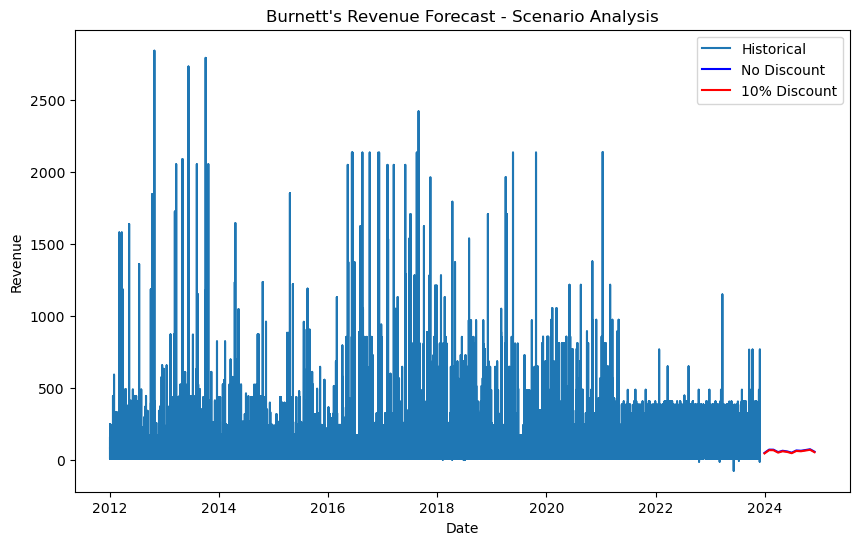

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

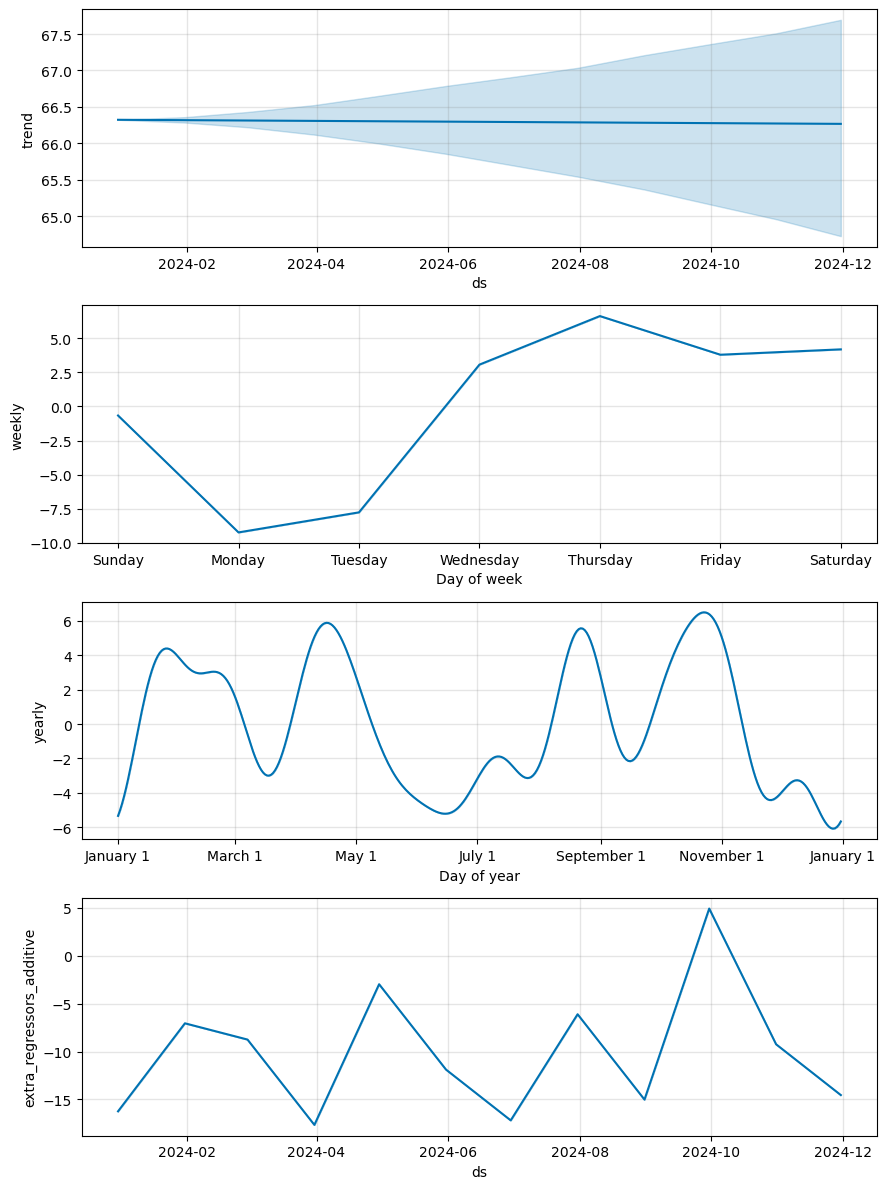

In [34]:
# Plot the forecasts for comparison
plt.figure(figsize=(10, 6))

# Historical data
plt.plot(burnetts_data['ds'], burnetts_data['y'], label='Historical')

# Forecast without discount
plt.plot(future_no_discount['ds'], forecast_no_discount['yhat'], label='No Discount', color='blue')

# Forecast with discount
plt.plot(future_discount['ds'], forecast_discount['yhat'], label='10% Discount', color='red')

plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# Plot forecast components for the discount scenario
model.plot_components(forecast_discount)
plt.show()

In [35]:
# Create a function to generate future data with scenarios
def create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0):
    future = pd.DataFrame({'ds': future_dates})
    future['month'] = future['ds'].dt.month
    future['quarter'] = future['ds'].dt.quarter
    future['day_of_week'] = future['ds'].dt.dayofweek
    future['price'] = burnetts_data['price'].mean() * price_adjustment
    future['discount'] = discount_flag
    return future

# Create future dates
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]

# Scenario: No discount
future_no_discount = create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0)
forecast_no_discount = model.predict(future_no_discount)

# Scenario: Apply a 10% discount
future_discount = create_future_scenario(future_dates, price_adjustment=0.9, discount_flag=1)
forecast_discount = model.predict(future_discount)

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/2488791685.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]


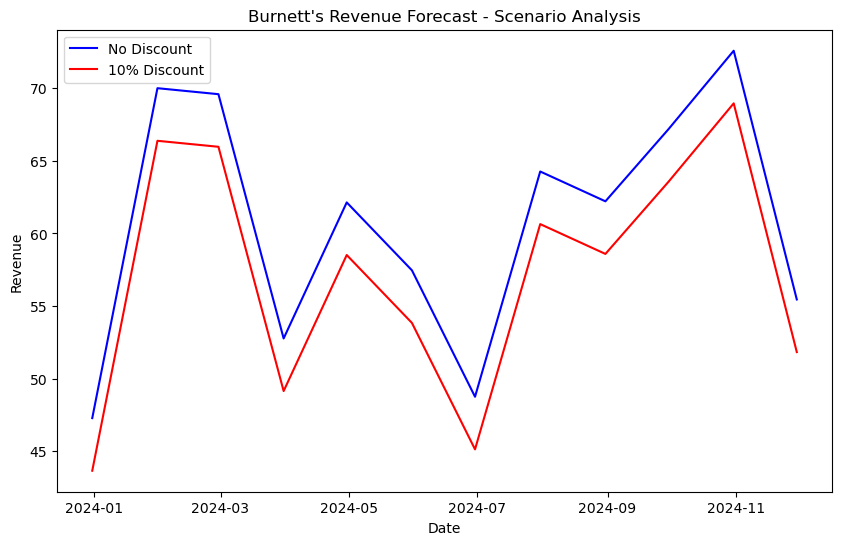

/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/marilynelkassis/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

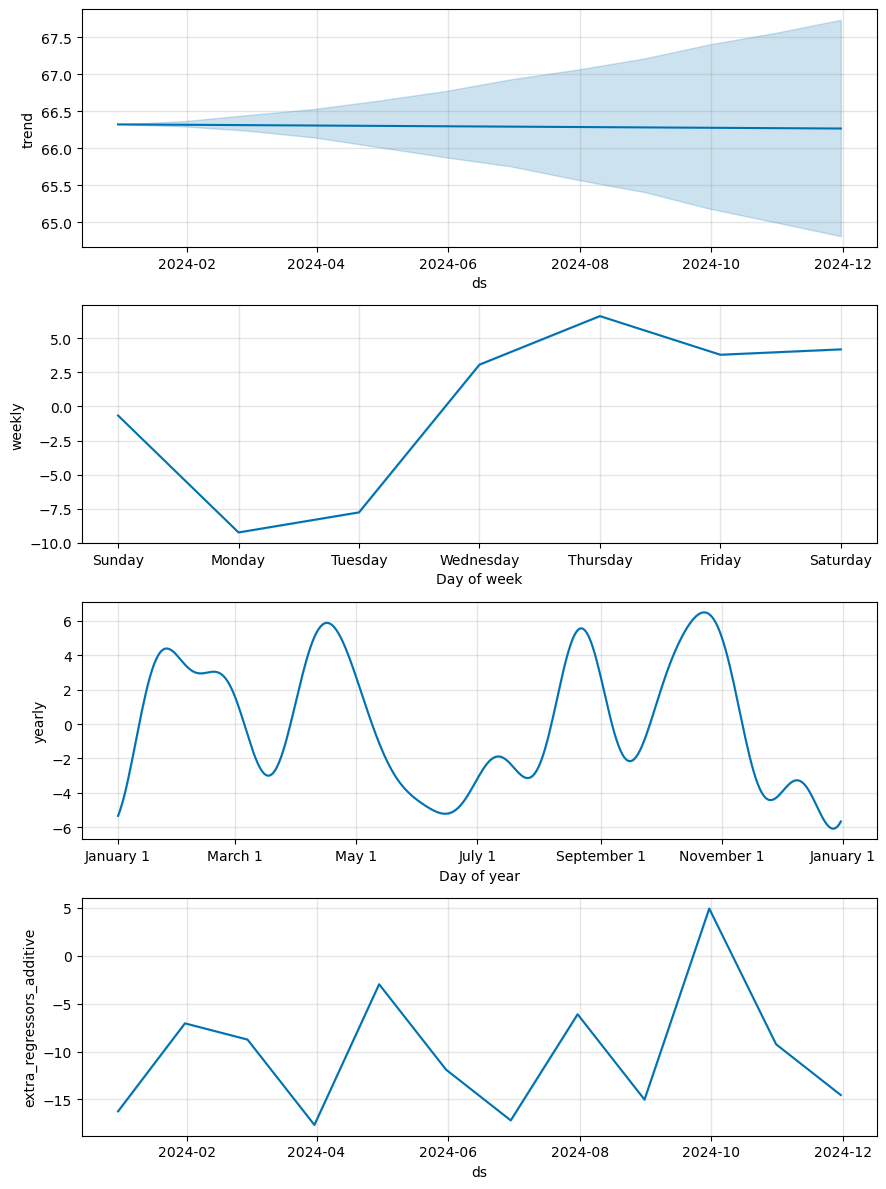

In [36]:
# Plot the forecasts for comparison
plt.figure(figsize=(10, 6))

# Forecast without discount
plt.plot(future_no_discount['ds'], forecast_no_discount['yhat'], label='No Discount', color='blue')

# Forecast with discount
plt.plot(future_discount['ds'], forecast_discount['yhat'], label='10% Discount', color='red')

plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# Plot forecast components for the discount scenario
model.plot_components(forecast_discount)
plt.show()

Mean Squared Error: 4.591275267914124


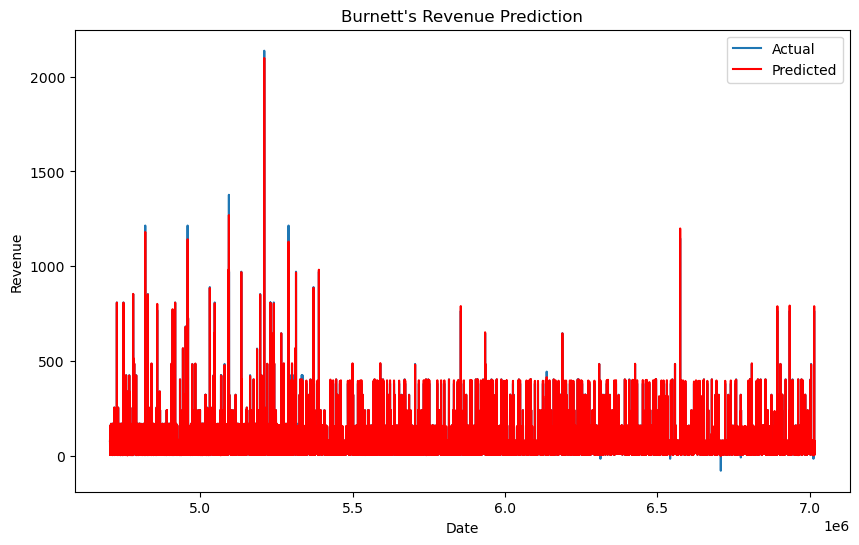

In [37]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit XGBoost's expected input format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Drop unnecessary columns
burnetts_data.drop(columns=['Store Number', 'County', 'Lat', 'Lon', 'Main Category', 'Category Name', 'Item Description', 'Vendor Name', 'Brand'], inplace=True)

# Create lag features
burnetts_data['lag_1'] = burnetts_data['y'].shift(1)
burnetts_data['lag_2'] = burnetts_data['y'].shift(2)
burnetts_data['lag_3'] = burnetts_data['y'].shift(3)

# Create rolling window statistics
burnetts_data['rolling_mean_3'] = burnetts_data['y'].rolling(window=3).mean()
burnetts_data['rolling_std_3'] = burnetts_data['y'].rolling(window=3).std()

# Drop rows with NaN values created by lag and rolling operations
burnetts_data = burnetts_data.dropna()

# Create time-based features
burnetts_data['month'] = burnetts_data['ds'].dt.month
burnetts_data['quarter'] = burnetts_data['ds'].dt.quarter
burnetts_data['day_of_week'] = burnetts_data['ds'].dt.dayofweek

# Add price feature
burnetts_data['price'] = burnetts_data['State Bottle Retail']

# Create hypothetical discount feature
burnetts_data['discount'] = 0  # No discount in historical data

# Split the data into train and test sets
X = burnetts_data.drop(columns=['y', 'ds'])
y = burnetts_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Burnett\'s Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [38]:
# Create a function to generate future data with scenarios
def create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0):
    future = pd.DataFrame({'ds': future_dates})
    future['month'] = future['ds'].dt.month
    future['quarter'] = future['ds'].dt.quarter
    future['day_of_week'] = future['ds'].dt.dayofweek
    future['price'] = burnetts_data['price'].mean() * price_adjustment
    future['discount'] = discount_flag
    return future

# Create future dates
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]

# Scenario: No discount
future_no_discount = create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0)

# Scenario: Apply a 10% discount
future_discount = create_future_scenario(future_dates, price_adjustment=0.9, discount_flag=1)

# Use the last available data to create lag and rolling features for the future data
last_data = burnetts_data.iloc[-1]

for future_df in [future_no_discount, future_discount]:
    for date in future_df['ds']:
        lag_1 = last_data['lag_1']
        lag_2 = last_data['lag_2']
        lag_3 = last_data['lag_3']
        rolling_mean_3 = last_data['rolling_mean_3']
        rolling_std_3 = last_data['rolling_std_3']
        
        future_df.loc[future_df['ds'] == date, 'lag_1'] = lag_1
        future_df.loc[future_df['ds'] == date, 'lag_2'] = lag_2
        future_df.loc[future_df['ds'] == date, 'lag_3'] = lag_3
        future_df.loc[future_df['ds'] == date, 'rolling_mean_3'] = rolling_mean_3
        future_df.loc[future_df['ds'] == date, 'rolling_std_3'] = rolling_std_3
        
        last_data = future_df.loc[future_df['ds'] == date]

# Ensure all original feature columns are included in the future dataframe
for col in X_train.columns:
    if col not in future_no_discount.columns:
        future_no_discount[col] = X_train[col].mean()
    if col not in future_discount.columns:
        future_discount[col] = X_train[col].mean()

# Predict future values
future_no_discount_pred = model.predict(future_no_discount.drop(columns=['ds']))
future_discount_pred = model.predict(future_discount.drop(columns=['ds']))

# Plot the future predictions
plt.figure(figsize=(10, 6))

# Forecast without discount
plt.plot(future_no_discount['ds'], future_no_discount_pred, label='No Discount', color='blue')

# Forecast with discount
plt.plot(future_discount['ds'], future_discount_pred, label='10% Discount', color='red')

plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/2016663184.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]


ValueError: feature_names mismatch: ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week', 'price', 'discount'] ['month', 'quarter', 'day_of_week', 'price', 'discount', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)']

Mean Squared Error: 4.591275267914124


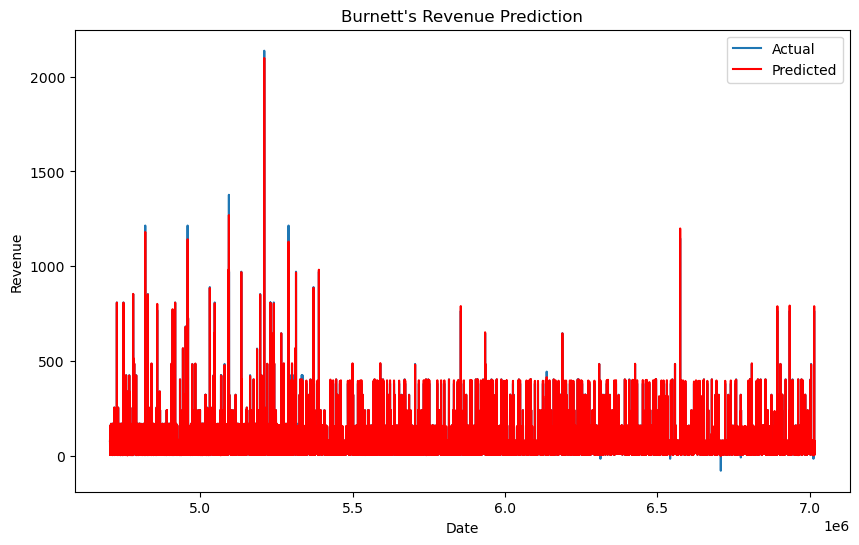

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/1261376111.py:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]


KeyError: 'ds'

In [48]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit XGBoost's expected input format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Drop unnecessary columns
burnetts_data.drop(columns=['Store Number', 'County', 'Lat', 'Lon', 'Main Category', 'Category Name', 'Item Description', 'Vendor Name', 'Brand'], inplace=True)

# Create lag features
burnetts_data['lag_1'] = burnetts_data['y'].shift(1)
burnetts_data['lag_2'] = burnetts_data['y'].shift(2)
burnetts_data['lag_3'] = burnetts_data['y'].shift(3)

# Create rolling window statistics
burnetts_data['rolling_mean_3'] = burnetts_data['y'].rolling(window=3).mean()
burnetts_data['rolling_std_3'] = burnetts_data['y'].rolling(window=3).std()

# Drop rows with NaN values created by lag and rolling operations
burnetts_data = burnetts_data.dropna()

# Create time-based features
burnetts_data['month'] = burnetts_data['ds'].dt.month
burnetts_data['quarter'] = burnetts_data['ds'].dt.quarter
burnetts_data['day_of_week'] = burnetts_data['ds'].dt.dayofweek

# Add price feature
burnetts_data['price'] = burnetts_data['State Bottle Retail']

# Create hypothetical discount feature
burnetts_data['discount'] = 0  # No discount in historical data

# Split the data into train and test sets
X = burnetts_data.drop(columns=['y', 'ds'])
y = burnetts_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Burnett\'s Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Create a function to generate future data with scenarios
def create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0):
    future = pd.DataFrame({'ds': future_dates})
    future['month'] = future['ds'].dt.month
    future['quarter'] = future['ds'].dt.quarter
    future['day_of_week'] = future['ds'].dt.dayofweek
    future['price'] = burnetts_data['price'].mean() * price_adjustment
    future['discount'] = discount_flag

    # Ensure all required columns are present
    for col in X_train.columns:
        if col not in future.columns:
            future[col] = burnetts_data[col].mean() if col in burnetts_data.columns else 0

    # Ensure the columns are in the same order as in the training set
    future = future[X_train.columns]
    
    return future

# Create future dates
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=13, freq='M')[1:]

# Scenario: No discount
future_no_discount = create_future_scenario(future_dates, price_adjustment=1.0, discount_flag=0)

# Scenario: Apply a 10% discount
future_discount = create_future_scenario(future_dates, price_adjustment=0.9, discount_flag=1)

# Use the last available data to create lag and rolling features for the future data
last_data = burnetts_data.iloc[-1]

for future_df in [future_no_discount, future_discount]:
    last_data_without_ds = last_data.drop(labels='ds')
    for date in future_df['ds']:
        future_df.loc[future_df['ds'] == date, 'lag_1'] = last_data_without_ds['y']
        future_df.loc[future_df['ds'] == date, 'lag_2'] = last_data_without_ds['lag_1']
        future_df.loc[future_df['ds'] == date, 'lag_3'] = last_data_without_ds['lag_2']
        future_df.loc[future_df['ds'] == date, 'rolling_mean_3'] = last_data_without_ds['rolling_mean_3']
        future_df.loc[future_df['ds'] == date, 'rolling_std_3'] = last_data_without_ds['rolling_std_3']
        
        # Update last_data for the next iteration
        last_data_without_ds = future_df.loc[future_df['ds'] == date].drop(labels='ds')

# Predict future values
future_no_discount_pred = model.predict(future_no_discount)
future_discount_pred = model.predict(future_discount)

# Plot the future predictions
plt.figure(figsize=(10, 6))

# Forecast without discount
plt.plot(future_no_discount['ds'], future_no_discount_pred, label='No Discount', color='blue')

# Forecast with discount
plt.plot(future_discount['ds'], future_discount_pred, label='10% Discount', color='red')

plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


In [49]:
# Use the last available data to create lag and rolling features for the future data
last_data = burnetts_data.iloc[-1].drop(labels='ds')

# Initialize the last data features separately
last_data_features = last_data.drop(labels='y')

for future_df in [future_no_discount, future_discount]:
    for date in future_df['ds']:
        future_df.loc[future_df['ds'] == date, 'lag_1'] = last_data['y']
        future_df.loc[future_df['ds'] == date, 'lag_2'] = last_data['lag_1']
        future_df.loc[future_df['ds'] == date, 'lag_3'] = last_data['lag_2']
        future_df.loc[future_df['ds'] == date, 'rolling_mean_3'] = last_data['rolling_mean_3']
        future_df.loc[future_df['ds'] == date, 'rolling_std_3'] = last_data['rolling_std_3']
        
        # Update last_data and last_data_features for the next iteration
        last_data = future_df.loc[future_df['ds'] == date]
        last_data_features = last_data.drop(labels='ds')

# Predict future values
future_no_discount_pred = model.predict(future_no_discount)
future_discount_pred = model.predict(future_discount)

# Plot the future predictions
plt.figure(figsize=(10, 6))

# Forecast without discount
plt.plot(future_no_discount['ds'], future_no_discount_pred, label='No Discount', color='blue')

# Forecast with discount
plt.plot(future_discount['ds'], future_discount_pred, label='10% Discount', color='red')

plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

KeyError: 'ds'

In [51]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for Burnett's brand
burnetts_data = vodka_data[vodka_data['Brand'].str.contains("Burnett", case=False, na=False)].copy()

# Ensure the 'Date' column is in datetime format
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])

# Rename columns to fit XGBoost's expected input format
burnetts_data.rename(columns={'Date': 'ds', 'Revenue': 'y'}, inplace=True)

# Check if 'ds' column exists and display the dataframe
print("First few rows of the dataframe to verify 'ds' column:")
print(burnetts_data.head())

# Ensure 'ds' column exists
assert 'ds' in burnetts_data.columns, "'ds' column is missing in burnetts_data"


First few rows of the dataframe to verify 'ds' column:
            ds  Store Number       County        Lat        Lon Main Category  \
66  2012-01-03          4073    WINNEBAGO  43.261538 -93.633306         VODKA   
209 2012-01-03          2614        SCOTT  41.556781 -90.548919         VODKA   
405 2012-01-03          2573    MUSCATINE  41.451349 -91.035138         VODKA   
487 2012-01-03          2603        SCOTT  41.552338 -90.483701         VODKA   
545 2012-01-03          3456  CERRO GORDO  43.142868 -93.378772         VODKA   

               Category Name      Item Description         Vendor Name  \
66            AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
209  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
405           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
487  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
545           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   

     Bottle V

In [52]:
# Create lag features
burnetts_data['lag_1'] = burnetts_data['y'].shift(1)
burnetts_data['lag_2'] = burnetts_data['y'].shift(2)
burnetts_data['lag_3'] = burnetts_data['y'].shift(3)

# Create rolling window statistics
burnetts_data['rolling_mean_3'] = burnetts_data['y'].rolling(window=3).mean()
burnetts_data['rolling_std_3'] = burnetts_data['y'].rolling(window=3).std()

# Drop rows with NaN values created by lag and rolling operations
burnetts_data = burnetts_data.dropna()

# Check if lag and rolling features are created and display the dataframe
print("First few rows of the dataframe to verify lag and rolling features:")
print(burnetts_data.head())

# Ensure lag and rolling features exist
required_columns = ['lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3']
for col in required_columns:
    assert col in burnetts_data.columns, f"'{col}' column is missing in burnetts_data"

First few rows of the dataframe to verify lag and rolling features:
            ds  Store Number       County        Lat        Lon Main Category  \
487 2012-01-03          2603        SCOTT  41.552338 -90.483701         VODKA   
545 2012-01-03          3456  CERRO GORDO  43.142868 -93.378772         VODKA   
614 2012-01-03          2959         POLK  41.637408 -93.697647         VODKA   
658 2012-01-03          2591         CASS  41.403856 -94.990031         VODKA   
686 2012-01-03          4106      DUBUQUE  42.511352 -90.720518         VODKA   

               Category Name      Item Description         Vendor Name  \
487  AMERICAN FLAVORED VODKA  BURNETTS FRUIT PUNCH  HEAVEN HILL BRANDS   
545           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
614           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
658           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   
686           AMERICAN VODKA        BURNETTS 80PRF  HEAVEN HILL BRANDS   



In [53]:
# Create time-based features
burnetts_data['month'] = burnetts_data['ds'].dt.month
burnetts_data['quarter'] = burnetts_data['ds'].dt.quarter
burnetts_data['day_of_week'] = burnetts_data['ds'].dt.dayofweek

# Add price feature
burnetts_data['price'] = burnetts_data['State Bottle Retail']

# Create hypothetical discount feature
burnetts_data['discount'] = 0  # No discount in historical data

# Drop unnecessary columns
burnetts_data.drop(columns=['Store Number', 'County', 'Lat', 'Lon', 'Main Category', 'Category Name', 'Item Description', 'Vendor Name', 'Brand'], inplace=True)

# Display the dataframe to verify the new features
print("First few rows of the dataframe to verify time-based features:")
print(burnetts_data.head())

# Ensure time-based features exist
time_based_features = ['month', 'quarter', 'day_of_week', 'price', 'discount']
for col in time_based_features:
    assert col in burnetts_data.columns, f"'{col}' column is missing in burnetts_data"

First few rows of the dataframe to verify time-based features:
            ds  Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
487 2012-01-03                 750               3.88                 6.15   
545 2012-01-03                1750               8.43                13.15   
614 2012-01-03                1750               8.43                13.15   
658 2012-01-03                 750               4.55                 6.82   
686 2012-01-03                 750               4.55                 6.82   

     Bottles Sold      y  Volume Sold (Liters)  lag_1  lag_2  lag_3  \
487             2  12.30                   1.5  78.90  18.45  78.90   
545             2  26.30                   3.5  12.30  78.90  18.45   
614             6  78.90                  10.5  26.30  12.30  78.90   
658             2  13.64                   1.5  78.90  26.30  12.30   
686             2  13.64                   1.5  13.64  78.90  26.30   

     rolling_mean_3  rolling_std_3  month

Mean Squared Error: 6.741328124317047


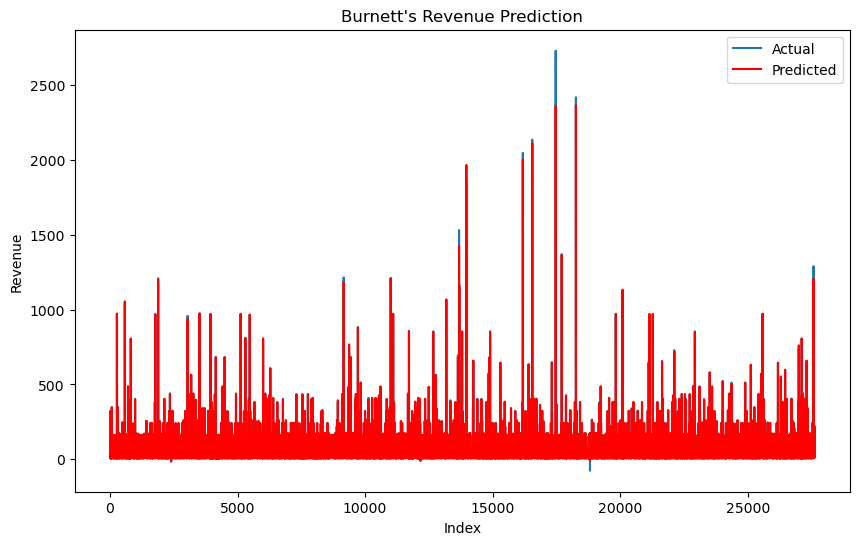

In [54]:
# Split the data into features (X) and target (y)
X = burnetts_data.drop(columns=['ds', 'y'])
y = burnetts_data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.title("Burnett's Revenue Prediction")
plt.xlabel("Index")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [57]:
# Verify columns of X_train
print("Columns in X_train:", X_train.columns)

# Verify columns of future_no_discount
print("Columns in future_no_discount:", future_no_discount.columns)

# Verify columns of future_discount
print("Columns in future_discount:", future_discount.columns)

Columns in X_train: Index(['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week',
       'price', 'discount'],
      dtype='object')
Columns in future_no_discount: Index(['ds', 'month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')
Columns in future_discount: Index(['ds', 'month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')


In [58]:
# Ensure future_no_discount and future_discount have the same columns as X_train
required_columns = X_train.columns.tolist()

for future_df in [future_no_discount, future_discount]:
    # Add any missing columns in the future dataframes
    for col in required_columns:
        if col not in future_df.columns:
            future_df[col] = X_train[col].mean()
    # Reorder columns to match X_train
    future_df = future_df[required_columns]

# Verify the reordered columns
print("Reordered columns in future_no_discount:", future_no_discount.columns)
print("Reordered columns in future_discount:", future_discount.columns)

Reordered columns in future_no_discount: Index(['ds', 'month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')
Reordered columns in future_discount: Index(['ds', 'month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')


In [62]:
future_no_discount.columns

Index(['month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')

In [63]:
future_discount.columns

Index(['month', 'quarter', 'day_of_week', 'price', 'discount',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3'],
      dtype='object')

In [64]:
# Step 2: Ensure all columns are numeric
for df in [future_no_discount, future_discount]:
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Align columns order with training data
required_columns = X_train.columns
future_no_discount = future_no_discount[required_columns]
future_discount = future_discount[required_columns]

# Verify column alignment
print("Columns in X_train:", X_train.columns)
print("Columns in future_no_discount:", future_no_discount.columns)
print("Columns in future_discount:", future_discount.columns)

Columns in X_train: Index(['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week',
       'price', 'discount'],
      dtype='object')
Columns in future_no_discount: Index(['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week',
       'price', 'discount'],
      dtype='object')
Columns in future_discount: Index(['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week',
       'price', 'discount'],
      dtype='object')


/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/3991462998.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')


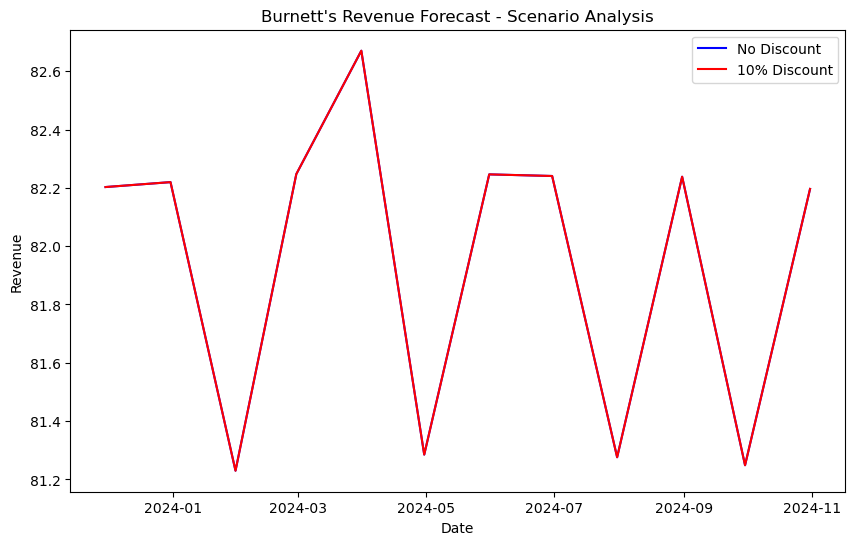

In [65]:
# Step 3: Predict future values
future_no_discount_pred = model.predict(future_no_discount)
future_discount_pred = model.predict(future_discount)

# Step 4: Create a DataFrame to store future dates and predictions
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')
future_predictions = pd.DataFrame({
    'ds': future_dates,
    'No Discount': future_no_discount_pred,
    '10% Discount': future_discount_pred
})

# Step 5: Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_predictions['ds'], future_predictions['No Discount'], label='No Discount', color='blue')
plt.plot(future_predictions['ds'], future_predictions['10% Discount'], label='10% Discount', color='red')
plt.title("Burnett's Revenue Forecast - Scenario Analysis")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

                 Feature  Importance
4   Volume Sold (Liters)    0.992143
2    State Bottle Retail    0.002794
3           Bottles Sold    0.002648
1      State Bottle Cost    0.000844
9          rolling_std_3    0.000535
0     Bottle Volume (ml)    0.000438
8         rolling_mean_3    0.000241
6                  lag_2    0.000194
5                  lag_1    0.000110
7                  lag_3    0.000023
10                 month    0.000020
12           day_of_week    0.000010
11               quarter    0.000000
13                 price    0.000000
14              discount    0.000000


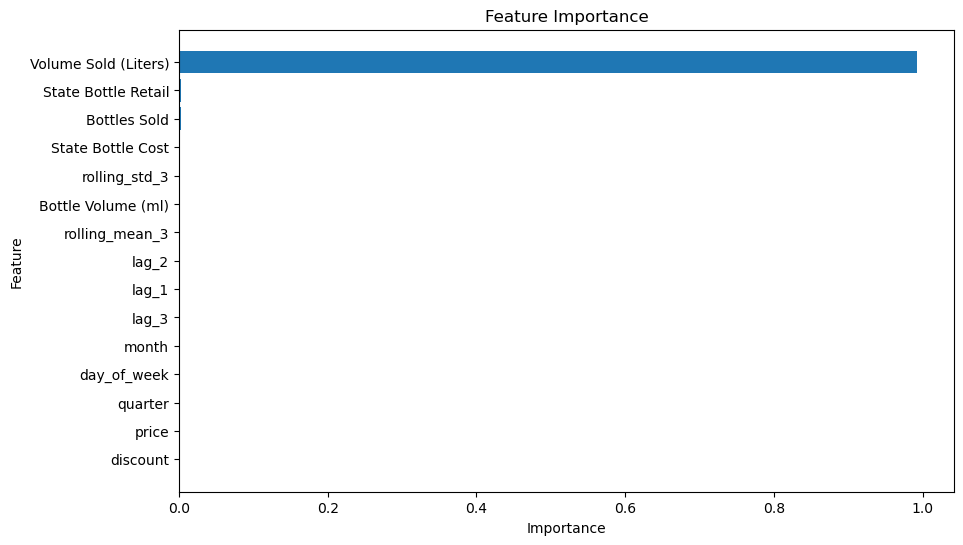

In [66]:
# Check feature importance
importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [68]:
# Add discount feature to the dataset
burnetts_data['discount'] = 0  # Initialize discount to 0

# Simulate some discount scenarios in the historical data for training
# Here, you can modify this logic to suit how you want to simulate the discounts
import random
for index, row in burnetts_data.iterrows():
    if random.random() < 0.1:  # 10% chance of discount
        burnetts_data.at[index, 'discount'] = random.uniform(0.1, 0.5)  # Apply a random discount between 10% to 50%

# Re-check the dataset after adding discount
print(burnetts_data[['ds', 'discount']].head(10))

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/3062578170.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17490050060819223' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  burnetts_data.at[index, 'discount'] = random.uniform(0.1, 0.5)  # Apply a random discount between 10% to 50%


            ds  discount
487 2012-01-03  0.000000
545 2012-01-03  0.000000
614 2012-01-03  0.000000
658 2012-01-03  0.000000
686 2012-01-03  0.174901
728 2012-01-03  0.000000
783 2012-01-03  0.000000
845 2012-01-03  0.000000
867 2012-01-03  0.000000
914 2012-01-03  0.000000


Mean Squared Error: 6.937814550428184


/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/675018131.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')


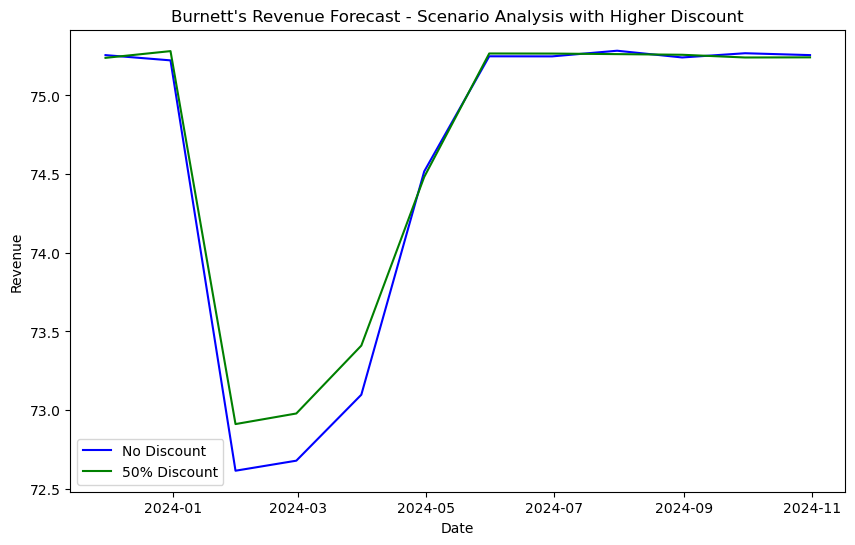

In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Select features and target
features = ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
            'Bottles Sold', 'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3',
            'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week',
            'price', 'discount']
target = 'y'

# Split the data into train and test sets
X = burnetts_data[features]
y = burnetts_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = ((y_pred - y_test) ** 2).mean()
print(f"Mean Squared Error: {mse}")

# Prepare future data for prediction
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')
future_no_discount = pd.DataFrame({
    'ds': future_dates,
    'month': future_dates.month,
    'quarter': future_dates.quarter,
    'day_of_week': future_dates.dayofweek,
    'discount': 0  # No discount scenario
})

# Fill other required features with mean values from training set
for col in X_train.columns:
    if col not in future_no_discount.columns:
        future_no_discount[col] = X_train[col].mean()

# Ensure all columns are in the correct order
future_no_discount = future_no_discount[X_train.columns]

# Predict future values
future_no_discount_pred = model.predict(future_no_discount)

# Now let's simulate a higher discount scenario (e.g., 50% discount)
future_discount = future_no_discount.copy()
future_discount['discount'] = 0.5
future_discount_pred = model.predict(future_discount)

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_no_discount_pred, label='No Discount', color='blue')
plt.plot(future_dates, future_discount_pred, label='50% Discount', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title("Burnett's Revenue Forecast - Scenario Analysis with Higher Discount")
plt.legend()
plt.show()

Future no discount data:
   Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  Bottles Sold  \
0          965.310011           5.504292             8.317555      8.037536   
1          965.310011           5.504292             8.317555      8.037536   
2          965.310011           5.504292             8.317555      8.037536   
3          965.310011           5.504292             8.317555      8.037536   
4          965.310011           5.504292             8.317555      8.037536   

   Volume Sold (Liters)     lag_1      lag_2      lag_3  rolling_mean_3  \
0              7.403115  64.35427  64.413464  64.307608       64.365291   
1              7.403115  64.35427  64.413464  64.307608       64.365291   
2              7.403115  64.35427  64.413464  64.307608       64.365291   
3              7.403115  64.35427  64.413464  64.307608       64.365291   
4              7.403115  64.35427  64.413464  64.307608       64.365291   

   rolling_std_3  month  quarter  day_of_week    

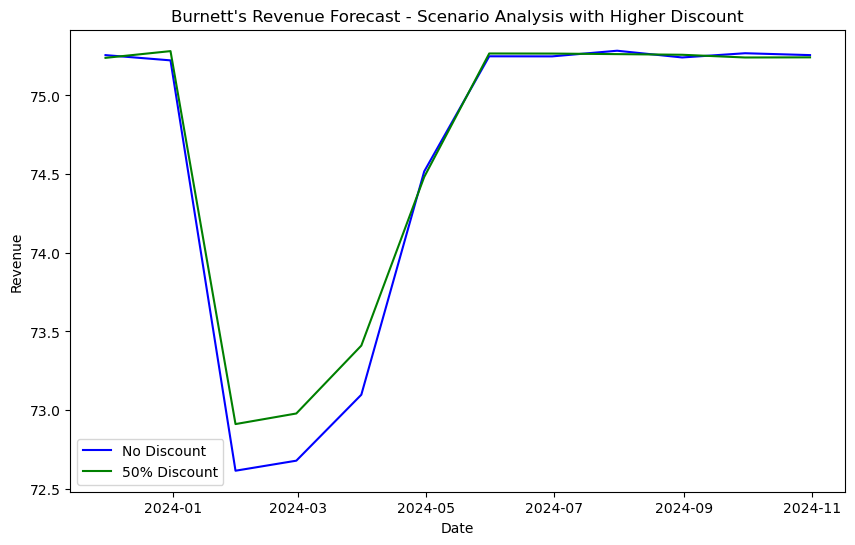

In [70]:
# Ensure all columns are in the correct order
future_no_discount = future_no_discount[X_train.columns]
future_discount = future_discount[X_train.columns]

# Debug print to check future_no_discount data
print("Future no discount data:")
print(future_no_discount.head())

# Predict future values
future_no_discount_pred = model.predict(future_no_discount)
future_discount_pred = model.predict(future_discount)

# Debug print to check predictions
print("Future no discount predictions:")
print(future_no_discount_pred)
print("Future discount predictions:")
print(future_discount_pred)

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_no_discount_pred, label='No Discount', color='blue')
plt.plot(future_dates, future_discount_pred, label='50% Discount', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title("Burnett's Revenue Forecast - Scenario Analysis with Higher Discount")
plt.legend()
plt.show()

In [71]:
print("Future no discount data distribution:")
print(future_no_discount[['price', 'discount']].describe())

print("Future discount data distribution:")
print(future_discount[['price', 'discount']].describe())

Future no discount data distribution:
              price  discount
count  1.200000e+01      12.0
mean   8.317555e+00       0.0
std    1.855344e-15       0.0
min    8.317555e+00       0.0
25%    8.317555e+00       0.0
50%    8.317555e+00       0.0
75%    8.317555e+00       0.0
max    8.317555e+00       0.0
Future discount data distribution:
              price  discount
count  1.200000e+01      12.0
mean   8.317555e+00       0.5
std    1.855344e-15       0.0
min    8.317555e+00       0.5
25%    8.317555e+00       0.5
50%    8.317555e+00       0.5
75%    8.317555e+00       0.5
max    8.317555e+00       0.5


In [72]:
# Check feature importance again after retraining the model
importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
4   Volume Sold (Liters)    0.991866
2    State Bottle Retail    0.002917
3           Bottles Sold    0.002762
1      State Bottle Cost    0.000860
9          rolling_std_3    0.000556
0     Bottle Volume (ml)    0.000403
8         rolling_mean_3    0.000263
6                  lag_2    0.000175
5                  lag_1    0.000128
10                 month    0.000027
7                  lag_3    0.000021
14              discount    0.000013
12           day_of_week    0.000008
11               quarter    0.000000
13                 price    0.000000


In [73]:
print("Historical discount impact on sales:")
print(burnetts_data.groupby('discount')['y'].describe())

Historical discount impact on sales:
             count       mean        std    min    25%    50%    75%      max
discount                                                                     
0.000000  124552.0  64.466739  68.012834 -76.50  20.25  79.20  81.84  2840.40
0.100005       1.0  88.080000        NaN  88.08  88.08  88.08  88.08    88.08
0.100035       1.0  20.160000        NaN  20.16  20.16  20.16  20.16    20.16
0.100046       1.0  40.500000        NaN  40.50  40.50  40.50  40.50    40.50
0.100056       1.0  81.000000        NaN  81.00  81.00  81.00  81.00    81.00
...            ...        ...        ...    ...    ...    ...    ...      ...
0.499870       1.0  85.440000        NaN  85.44  85.44  85.44  85.44    85.44
0.499890       1.0  14.500000        NaN  14.50  14.50  14.50  14.50    14.50
0.499914       1.0  80.640000        NaN  80.64  80.64  80.64  80.64    80.64
0.499977       1.0  33.600000        NaN  33.60  33.60  33.60  33.60    33.60
0.499985       1.0  87.1200

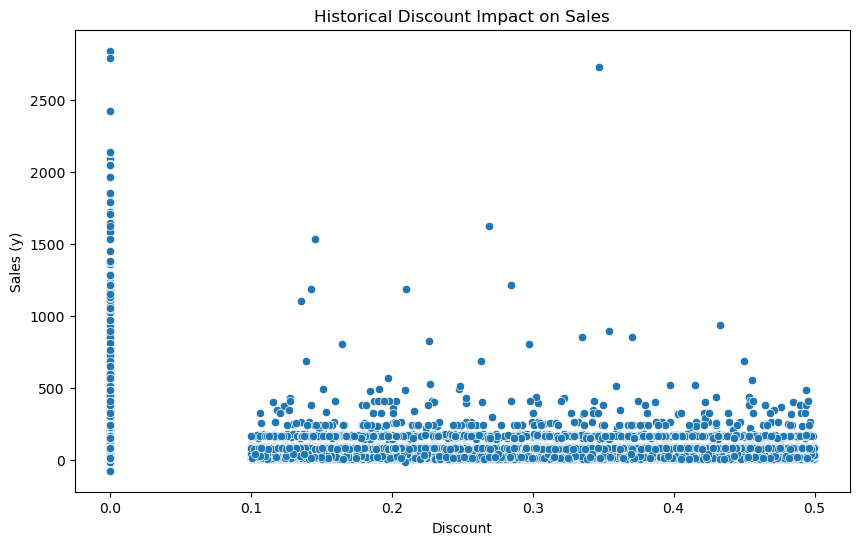

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot historical discount impact on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='y', data=burnetts_data)
plt.title('Historical Discount Impact on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales (y)')
plt.show()


/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_3704/1052011336.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')


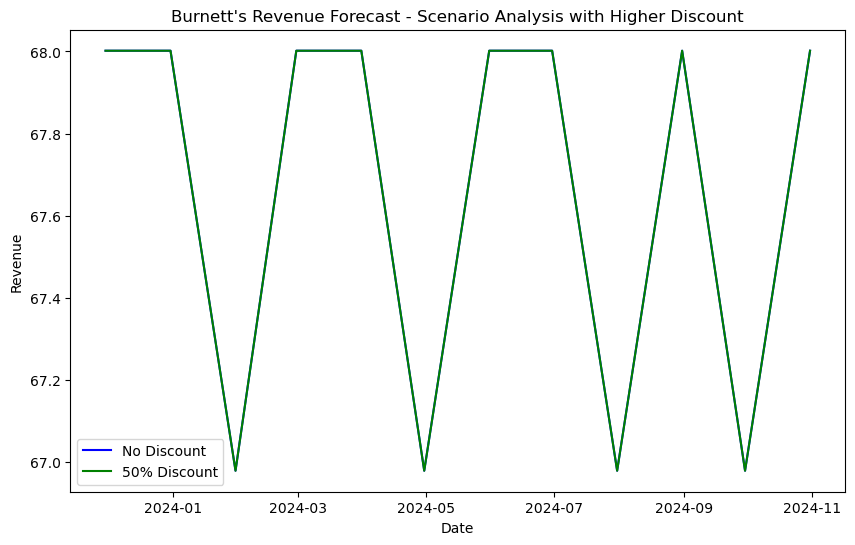

In [76]:
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Step 1: Create interaction features
burnetts_data['discount_x_volume'] = burnetts_data['discount'] * burnetts_data['Volume Sold (Liters)']
burnetts_data['discount_x_price'] = burnetts_data['discount'] * burnetts_data['price']

# Include these interaction features in the training set
interaction_features = ['discount_x_volume', 'discount_x_price']
X_train = burnetts_data[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 
                         'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 
                         'rolling_std_3', 'month', 'quarter', 'day_of_week', 'price', 
                         'discount'] + interaction_features]

y_train = burnetts_data['y']

# Step 2: Retrain the model with interaction features
# Define the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model
model.fit(X_train, y_train)

# Step 3: Predict future values
# Define future data with no discount and with a 50% discount
future_dates = pd.date_range(start=burnetts_data['ds'].max(), periods=12, freq='M')
future_no_discount = pd.DataFrame({
    'ds': future_dates,
    'discount': 0,
    'price': X_train['price'].mean(),
    'Volume Sold (Liters)': X_train['Volume Sold (Liters)'].mean(),
    'lag_1': X_train['lag_1'].mean(),
    'lag_2': X_train['lag_2'].mean(),
    'lag_3': X_train['lag_3'].mean(),
    'rolling_mean_3': X_train['rolling_mean_3'].mean(),
    'rolling_std_3': X_train['rolling_std_3'].mean(),
    'month': future_dates.month,
    'quarter': future_dates.quarter,
    'day_of_week': future_dates.dayofweek,
    'Bottle Volume (ml)': X_train['Bottle Volume (ml)'].mean(),
    'State Bottle Cost': X_train['State Bottle Cost'].mean(),
    'State Bottle Retail': X_train['State Bottle Retail'].mean(),
    'Bottles Sold': X_train['Bottles Sold'].mean(),
    'discount_x_volume': 0,
    'discount_x_price': 0
})

future_discount = future_no_discount.copy()
future_discount['discount'] = 0.5
future_discount['discount_x_volume'] = future_discount['discount'] * future_discount['Volume Sold (Liters)']
future_discount['discount_x_price'] = future_discount['discount'] * future_discount['price']

# Reorder the columns to match X_train
required_columns = X_train.columns.tolist()
future_no_discount = future_no_discount[required_columns]
future_discount = future_discount[required_columns]

# Convert all columns to numeric type
for df in [future_no_discount, future_discount]:
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Predict future values
future_no_discount_pred = model.predict(future_no_discount)
future_discount_pred = model.predict(future_discount)

# Step 5: Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_no_discount_pred, label='No Discount', color='blue')
plt.plot(future_dates, future_discount_pred, label='50% Discount', color='green')
plt.title("Burnett's Revenue Forecast - Scenario Analysis with Higher Discount")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

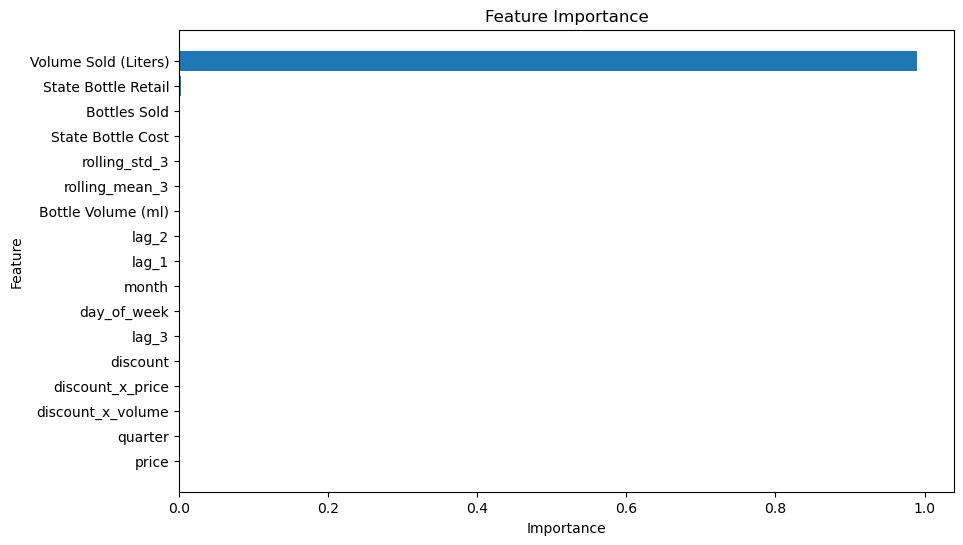

                 Feature  Importance
4   Volume Sold (Liters)    0.989791
2    State Bottle Retail    0.003350
3           Bottles Sold    0.002043
1      State Bottle Cost    0.001245
9          rolling_std_3    0.001208
8         rolling_mean_3    0.000666
0     Bottle Volume (ml)    0.000578
6                  lag_2    0.000504
5                  lag_1    0.000355
10                 month    0.000095
12           day_of_week    0.000065
7                  lag_3    0.000063
14              discount    0.000032
16      discount_x_price    0.000003
15     discount_x_volume    0.000002
11               quarter    0.000000
13                 price    0.000000


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Create interaction features
burnetts_data['discount_x_volume'] = burnetts_data['discount'] * burnetts_data['Volume Sold (Liters)']
burnetts_data['discount_x_price'] = burnetts_data['discount'] * burnetts_data['price']

# Select features for the model
features = ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)', 
            'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3', 'month', 'quarter', 'day_of_week', 
            'price', 'discount', 'discount_x_volume', 'discount_x_price']

# Define target variable
target = 'y'

# Split the data
X_train = burnetts_data[features]
y_train = burnetts_data[target]

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Check feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print the feature importance dataframe
print(feature_importance_df)


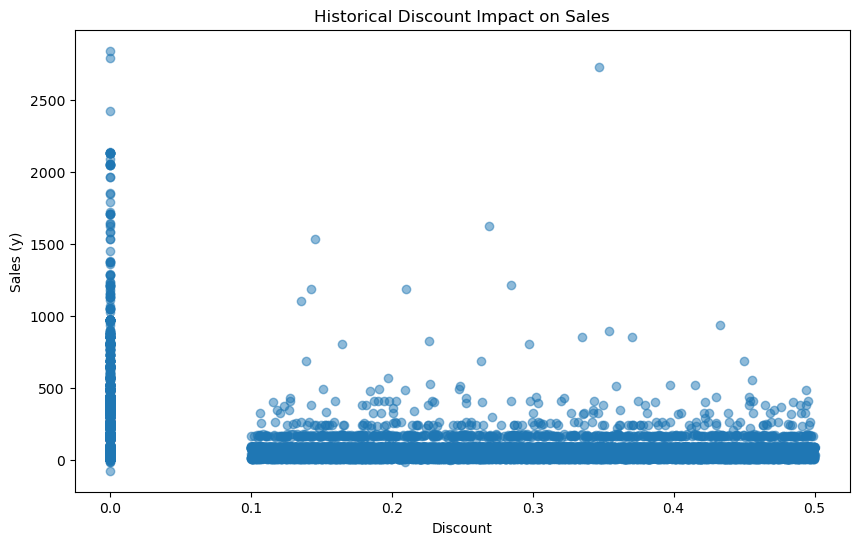

Historical discount impact on sales:
             count       mean        std    min    25%    50%    75%      max
discount                                                                     
0.000000  124552.0  64.466739  68.012834 -76.50  20.25  79.20  81.84  2840.40
0.100005       1.0  88.080000        NaN  88.08  88.08  88.08  88.08    88.08
0.100035       1.0  20.160000        NaN  20.16  20.16  20.16  20.16    20.16
0.100046       1.0  40.500000        NaN  40.50  40.50  40.50  40.50    40.50
0.100056       1.0  81.000000        NaN  81.00  81.00  81.00  81.00    81.00
...            ...        ...        ...    ...    ...    ...    ...      ...
0.499870       1.0  85.440000        NaN  85.44  85.44  85.44  85.44    85.44
0.499890       1.0  14.500000        NaN  14.50  14.50  14.50  14.50    14.50
0.499914       1.0  80.640000        NaN  80.64  80.64  80.64  80.64    80.64
0.499977       1.0  33.600000        NaN  33.60  33.60  33.60  33.60    33.60
0.499985       1.0  87.1200

In [78]:
# Plot the historical discount impact on sales
plt.figure(figsize=(10, 6))
plt.scatter(burnetts_data['discount'], burnetts_data['y'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Sales (y)')
plt.title('Historical Discount Impact on Sales')
plt.show()

# Print summary statistics
print("Historical discount impact on sales:")
print(burnetts_data.groupby('discount')['y'].describe())

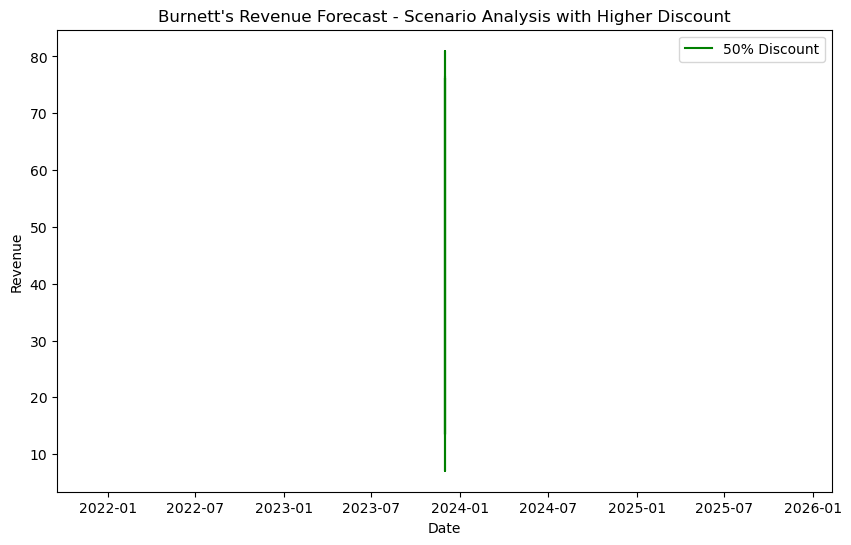

In [79]:
# Create future data with higher discount
future_discount = burnetts_data.tail(12).copy()  # Assuming we want to predict for the next 12 months
future_discount['discount'] = 0.5  # Apply 50% discount

# Add interaction features
future_discount['discount_x_volume'] = future_discount['discount'] * future_discount['Volume Sold (Liters)']
future_discount['discount_x_price'] = future_discount['discount'] * future_discount['price']

# Predict future values
future_discount_pred = model.predict(future_discount[features])

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_discount['ds'], future_discount_pred, label='50% Discount', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Burnett\'s Revenue Forecast - Scenario Analysis with Higher Discount')
plt.legend()
plt.show()

In [80]:
# Display the data used for predictions
print(future_discount.head())

                ds  Bottle Volume (ml)  State Bottle Cost  \
7015497 2023-11-30                1750                8.5   
7015534 2023-11-30                1750                8.5   
7015613 2023-11-30                 750                4.5   
7015777 2023-11-30                1750                8.5   
7015975 2023-11-30                 750                4.5   

         State Bottle Retail  Bottles Sold      y  Volume Sold (Liters)  \
7015497                12.75             6  76.50                 10.50   
7015534                12.75             6  76.50                 10.50   
7015613                 6.75             2  13.50                  1.50   
7015777                12.75             6  76.50                 10.50   
7015975                 6.75             1   6.75                  0.75   

         lag_1  lag_2  lag_3  rolling_mean_3  rolling_std_3  month  quarter  \
7015497   81.0   13.5  765.0           57.00      37.739237     11        4   
7015534   76.5   81.0   

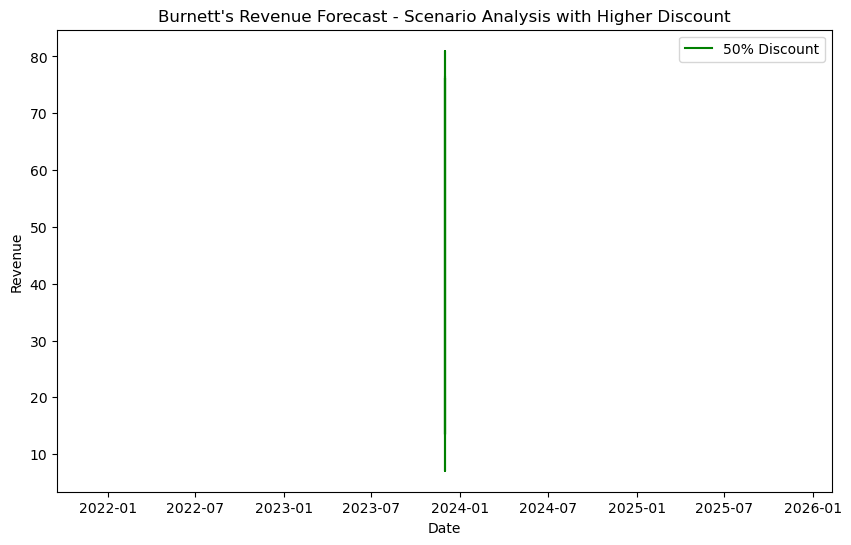

In [81]:
# Model training
model.fit(X_train, y_train)

# Predict future values
future_discount_pred = model.predict(future_discount[features])

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_discount['ds'], future_discount_pred, label='50% Discount', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title("Burnett's Revenue Forecast - Scenario Analysis with Higher Discount")
plt.legend()
plt.show()

In [87]:
# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Print column names
print(data.columns)


Index(['Date', 'Store Number', 'County', 'Lat', 'Lon', 'Main Category',
       'Category Name', 'Item Description', 'Vendor Name',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Revenue', 'Volume Sold (Liters)', 'Brand'],
      dtype='object')


In [88]:
import pandas as pd

# Load the dataset
data = pd.read_csv('vodka_data.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check the column names to find the exact name of the sales column
print(data.columns)

# Assuming 'Sale (Dollars)' is the correct column name
# Create lag features
data['lag_1'] = data['Sale (Dollars)'].shift(1)
data['lag_2'] = data['Sale (Dollars)'].shift(2)
data['lag_3'] = data['Sale (Dollars)'].shift(3)

# Create rolling mean and std features
data['rolling_mean_3'] = data['Sale (Dollars)'].rolling(window=3).mean()
data['rolling_std_3'] = data['Sale (Dollars)'].rolling(window=3).std()

# Extract date-based features
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter
data['day_of_week'] = data['Date'].dt.dayofweek

# Create the 'discount' column (assuming you have logic to define it)
data['discount'] = 0  # Placeholder, replace with actual logic

# Drop rows with NaN values created by shifting/rolling
data.dropna(inplace=True)

# Select relevant columns
features = ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
            'Volume Sold (Liters)', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3',
            'month', 'quarter', 'day_of_week', 'discount']

X = data[features]
y = data['Sale (Dollars)']


Index(['Date', 'Store Number', 'County', 'Lat', 'Lon', 'Main Category',
       'Category Name', 'Item Description', 'Vendor Name',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Revenue', 'Volume Sold (Liters)', 'Brand'],
      dtype='object')


KeyError: 'Sale (Dollars)'

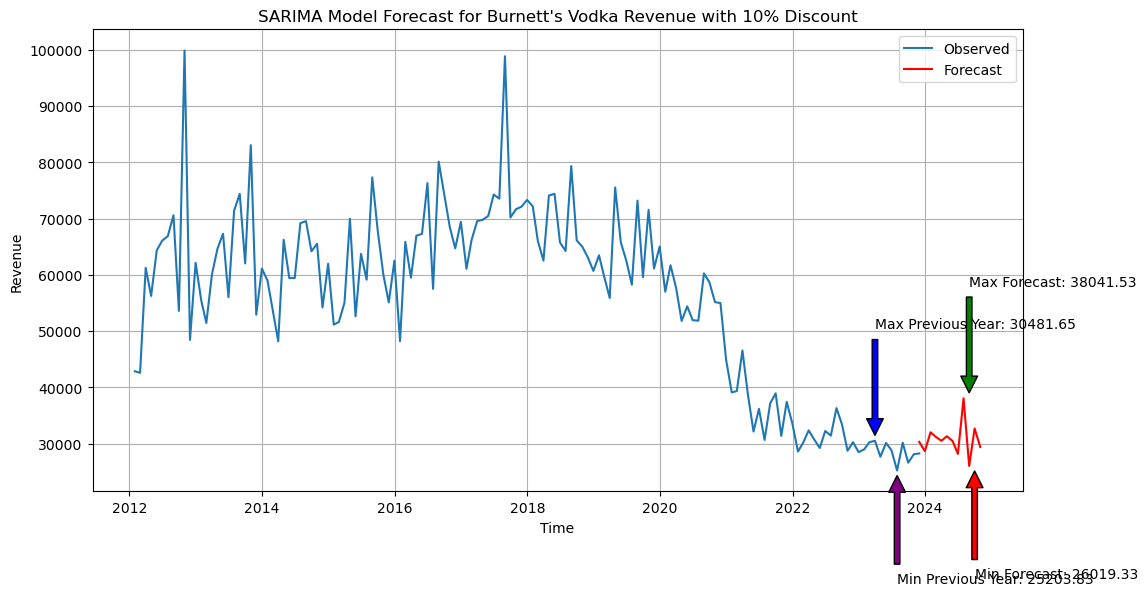

Forecasted Revenue for 2024:
2023-12-31    30285.636661
2024-01-31    28633.646036
2024-02-29    31999.838694
2024-03-31    31188.729673
2024-04-30    30478.349166
2024-05-31    31293.990878
2024-06-30    30471.549174
2024-07-31    28154.807273
2024-08-31    38041.532502
2024-09-30    26019.327389
2024-10-31    32675.275961
2024-11-30    29376.411887
Freq: ME, Name: predicted_mean, dtype: float64

Interpretation:
The SARIMA model has been used to forecast the revenue for Burnett's vodka for the year 2024 with a 10% discount applied to the state bottle retail price. The forecasted values show the expected monthly revenue for the upcoming year. The annotations on the graph represent these forecasted values along with the maximum and minimum values of the previous year for comparison.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
# Assuming the data is loaded from 'vodka_data.csv'
vodka_data = pd.read_csv('vodka_data.csv')

# Filter for "Burnetts" vodka brand
burnetts_data = vodka_data[vodka_data['Brand'] == 'BURNETTS']

# Apply a 10% discount to "state bottle retail" price
burnetts_data['Discounted State Bottle Retail'] = burnetts_data['State Bottle Retail'] * 0.9

# Calculate the new revenue with the discounted price
burnetts_data['Discounted Revenue'] = burnetts_data['Discounted State Bottle Retail'] * burnetts_data['Bottles Sold']

# Group by month and sum the revenue
burnetts_data['Date'] = pd.to_datetime(burnetts_data['Date'])
monthly_revenue = burnetts_data.resample('M', on='Date').sum()['Discounted Revenue']

# Perform differencing to make the data stationary
y_diff = monthly_revenue.diff().dropna()
y_diff2 = y_diff.diff().dropna()

# Fit the SARIMA model on the twice-differenced data
model = SARIMAX(y_diff2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future values (next 12 months for 2024)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Convert the differenced forecast back to the original scale if differencing was applied
if y_diff2.shape[0] > 0:
    forecast_cumsum = forecast.cumsum()  # Cumulative sum to reverse differencing
    forecast = monthly_revenue.iloc[-1] + forecast_cumsum  # Adding last known value to forecasted cumsum

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue, label='Observed')
plt.plot(pd.date_range(monthly_revenue.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', color='red')
plt.title("SARIMA Model Forecast for Burnett's Vodka Revenue with 10% Discount")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)

# Annotate the maximum and minimum values of the forecast and the year before the forecast
max_forecast = forecast.max()
min_forecast = forecast.min()
max_forecast_date = forecast.idxmax()
min_forecast_date = forecast.idxmin()

previous_year_max = monthly_revenue[-12:].max()
previous_year_min = monthly_revenue[-12:].min()
previous_year_max_date = monthly_revenue[-12:].idxmax()
previous_year_min_date = monthly_revenue[-12:].idxmin()

plt.annotate(f'Max Forecast: {max_forecast:.2f}', xy=(max_forecast_date, max_forecast), xytext=(max_forecast_date, max_forecast + 20000),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Min Forecast: {min_forecast:.2f}', xy=(min_forecast_date, min_forecast), xytext=(min_forecast_date, min_forecast - 20000),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate(f'Max Previous Year: {previous_year_max:.2f}', xy=(previous_year_max_date, previous_year_max), xytext=(previous_year_max_date, previous_year_max + 20000),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'Min Previous Year: {previous_year_min:.2f}', xy=(previous_year_min_date, previous_year_min), xytext=(previous_year_min_date, previous_year_min - 20000),
             arrowprops=dict(facecolor='purple', shrink=0.05))

plt.show()

# Print the forecasted values
print("Forecasted Revenue for 2024:")
print(forecast)

# Interpretation of the results
print("\nInterpretation:")
print("The SARIMA model has been used to forecast the revenue for Burnett's vodka for the year 2024 with a 10% discount applied to the state bottle retail price. The forecasted values show the expected monthly revenue for the upcoming year. The annotations on the graph represent these forecasted values along with the maximum and minimum values of the previous year for comparison.")
